In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
run_dataset = []
pdf_list = []

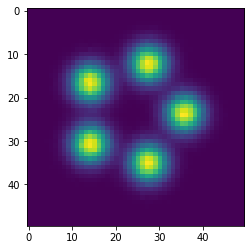

In [3]:
# Gaussian mixture 

import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()  # for plot styling

# Number of samples
n_samples = 1000000

# Define the circle radius and angle for the 5 Gaussian mixtures
radius = 10
angles = np.linspace(0, 2 * np.pi, 6)[:-1]  # exclude the last angle because it's the same as the first

# Initialize an empty array for the samples
samples = np.empty((0, 2))

# Define mixing proportions
mixing_proportions = [0.2, 0.2, 0.2, 0.2, 0.2]  # equal proportions

# Initialize variances for each Gaussian distribution
variances = np.linspace(6, 6, 5)

# Create Gaussian mixtures
for angle, proportion, variance in zip(angles, mixing_proportions, variances):
    # Compute the mean of the Gaussian
    mean = radius * np.array([np.cos(angle), np.sin(angle)])

    # Covariance matrix of the Gaussian (diagonal for independent components)
    cov_matrix = np.diag([variance, variance])

    # Generate samples from the Gaussian distribution
    samples_gaussian = np.random.multivariate_normal(mean, cov_matrix, size=int(n_samples * proportion))

    # Append the generated samples to the main samples array
    samples = np.vstack([samples, samples_gaussian])

X_train = samples
X_train = X_train-X_train.min()
X_train = X_train/X_train.max()

# plt.figure(figsize=(3, 3))
# # Plot the Gaussian mixture
# plt.scatter(X_train[::1, 0], X_train[::1, 1], color='blue', alpha=0.5, s=1)
# plt.show()

# Define the range for both axes
axis_range = [(0, 1), (0, 1)]

# Define the number of bins
bins = 50

# Calculate the 2D histogram and return the matrix of histogram values
hist, xedges, yedges = np.histogram2d(X_train[:, 0], X_train[:, 1], bins=bins, range=axis_range, density=True)

# Normalize the histogram to make it a PDF
pdf = hist / np.sum(hist)
pdf = torch.from_numpy(pdf.T)

plt.imshow(pdf)
plt.show()

run_dataset.append(X_train[::10])
pdf_list.append(pdf)

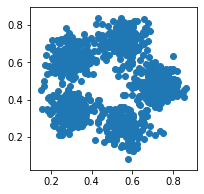

In [4]:
plt.figure(figsize=(3, 3))
plt.scatter(run_dataset[0][::100, 0], run_dataset[0][::100, 1])
plt.show()

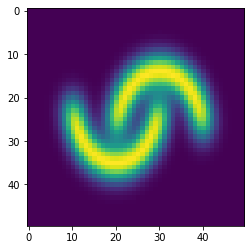

In [5]:
# two moon 

# producing matching results

# Neural Networks

X, y = make_moons(n_samples=100000000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = X_train-X_train.min(0)
X_train = X_train/X_train.max(0)

# Define the range for both axes
axis_range = [(0, 1), (0, 1)]

# Define the number of bins
bins = 50

# Calculate the 2D histogram and return the matrix of histogram values
hist, xedges, yedges = np.histogram2d(X_train[:, 0], X_train[:, 1], bins=bins, range=axis_range, density=True)

# Normalize the histogram to make it a PDF
pdf = hist / np.sum(hist)
pdf = torch.from_numpy(pdf.T)

plt.imshow(pdf)
plt.show()

run_dataset.append(X_train[:100000])
pdf_list.append(pdf)

In [6]:
# plt.figure(figsize=(3, 3))
# plt.scatter(X_train[::1, 0], X_train[::1, 1], s=1, color='blue')
# plt.show()

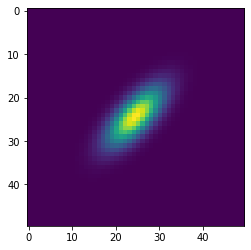

In [7]:
def generate_gaussian_data(n_samples=100000, mean=[0, 0], std_dev=[1, 1], rho=0):
    # Calculate the covariance using rho
    covariance = rho * std_dev[0] * std_dev[1]
    cov_matrix = [[std_dev[0]**2, covariance], [covariance, std_dev[1]**2]]
    
    # Sample from the multivariate Gaussian
    data = np.random.multivariate_normal(mean, cov_matrix, n_samples)
    data = data-data.min()
    data = data/data.max()

    return data

data = generate_gaussian_data(10000000, rho=-0.7)
data = data-data.mean(0)
data = data/data.max(0)
X_train = data

X_train = X_train-X_train.min()
X_train = X_train/X_train.max()

# plt.figure(figsize=(3, 3))
# plt.scatter(X_train[::1, 0], X_train[::1, 1], s=1, color='blue')
# plt.show()

# Define the range for both axes
axis_range = [(0, 1), (0, 1)]

# Define the number of bins
bins = 50

# Calculate the 2D histogram and return the matrix of histogram values
hist, xedges, yedges = np.histogram2d(X_train[:, 0], X_train[:, 1], bins=bins, range=axis_range, density=True)

# Normalize the histogram to make it a PDF
pdf = hist / np.sum(hist)
pdf = torch.from_numpy(pdf.T)

plt.imshow(pdf)
plt.show()

run_dataset.append(X_train[:100000])
pdf_list.append(pdf)

In [8]:
!pip install python-mnist

# WHETHER TO COMMENT

import numpy as np
import matplotlib.pyplot as plt

import csv

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from sklearn.linear_model import LinearRegression

import sklearn
from sklearn import datasets

import skimage

In [9]:
class net(nn.Module):
    def __init__(self, input_dim = 784, HIDDEN = 2000, out_dim = 200):
        super(net, self).__init__()
        self.dim = out_dim
    
        self.fc1 = nn.Linear(input_dim+5, HIDDEN, bias=True)
        self.bn1 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn2 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc3 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn3 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc4 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn4 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc5 = nn.Linear(HIDDEN, out_dim, bias=True)

        self.fc6 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn6 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc7 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn7 = torch.nn.BatchNorm1d(HIDDEN)

    def forward(self, x):
        
        x = torch.cat((x, torch.zeros((x.shape[0], 5)).uniform_().cuda()), 1)
        x = self.bn1(torch.relu((self.fc1(x))))
        x = self.bn2(torch.relu((self.fc2(x))))
        x = self.bn3(torch.relu((self.fc3(x))))
        x = torch.tanh(self.fc5(x))

        return x

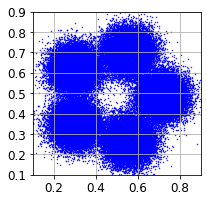

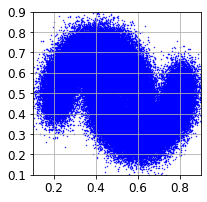

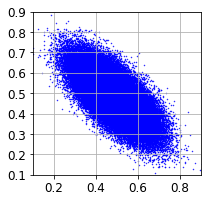

In [10]:
from matplotlib.font_manager import FontProperties
import seaborn as sns

def print_figures(centers, k):
    fig, ax = plt.subplots(figsize=(3, 3))
    
    plt.scatter(centers[:, 0], centers[:, 1], s=.2, c='blue')
    
    bold_font = FontProperties()
#     bold_font.set_weight('bold')
    bold_font.set_size(12)
#     sns.despine(trim=True, offset=5)

    for label in ax.get_xticklabels():
        label.set_fontproperties(bold_font)

    # Set tick labels to bold for the y-axis
    for label in ax.get_yticklabels():
        label.set_fontproperties(bold_font)
    
    plt.xlim(0.1, 0.9)
    plt.ylim(0.1, 0.9)
    
    plt.grid('None')

    plt.savefig('{0}.png'.format(k),bbox_inches='tight', dpi=300)
    
    plt.show()
    
# print_figures(save_centers[0], 0)
# print_figures(save_centers[1], 1)
# print_figures(save_centers[2], 2)

print_figures(run_dataset[0], 0)
print_figures(run_dataset[1], 1)
print_figures(run_dataset[2], 2)

In [12]:
class encoder(nn.Module):
    def __init__(self, input_dim = 784, HIDDEN = 2000, out_dim = 200):
        super(encoder, self).__init__()
        self.dim = out_dim
    
        self.fc1 = nn.Linear(input_dim+10, HIDDEN, bias=True)
        self.bn1 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn2 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc3 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn3 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc4 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn4 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc6 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn6 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc7 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn7 = torch.nn.BatchNorm1d(HIDDEN)

        self.fc5 = nn.Linear(HIDDEN, out_dim, bias=True)

    def forward(self, x):
        
        x = torch.cat((x, torch.zeros((x.shape[0], 10)).uniform_().cuda()), 1)
        x = self.bn1(torch.relu((self.fc1(x))))
        x = self.bn2(torch.relu((self.fc2(x))))
        x = self.bn3(torch.relu((self.fc3(x))))

        x = torch.sigmoid(self.fc5(x))

        return x

class decoder(nn.Module):
    def __init__(self, input_dim = 20, HIDDEN = 2000, out_dim = 784):
        super(decoder, self).__init__()
        self.dim = out_dim
    
        self.fc1 = nn.Linear(input_dim+10, HIDDEN, bias=True)
        self.bn1 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn2 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc3 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn3 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc4 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn4 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc6 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn6 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc7 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn7 = torch.nn.BatchNorm1d(HIDDEN)

        self.fc5 = nn.Linear(HIDDEN, out_dim, bias=True)

    def forward(self, x):
        
        x = torch.cat((x, torch.zeros((x.shape[0], 10)).uniform_().cuda()), 1)
        x = self.bn1(torch.relu((self.fc1(x))))
        x = self.bn2(torch.relu((self.fc2(x))))
        x = self.bn3(torch.relu((self.fc3(x))))
#         x = self.bn4(torch.relu((self.fc4(x))))
#         x = self.bn6(torch.relu((self.fc6(x))))

        x = torch.sigmoid(self.fc5(x))

        return x

0 0.047941818833351135


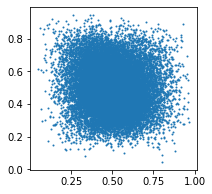

100 0.007316660135984421
200 0.005048542283475399
300 0.003359480993822217
400 0.003266761312261224
500 0.002990845125168562
600 0.00302098854444921
700 0.002823738381266594
800 0.0023750353138893843
900 0.002304957015439868
1000 0.002408599015325308
1100 0.0021370635367929935
1200 0.002052478725090623
1300 0.002052463125437498
1400 0.0020436826162040234
1500 0.0021574145648628473
1600 0.002274970756843686
1700 0.0020677130669355392
1800 0.002005411544814706
1900 0.0018826194573193789
2000 0.00204427819699049


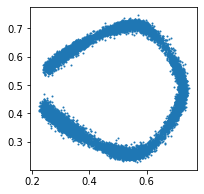

2100 0.0018278233474120498
2200 0.0018676803447306156
2300 0.0018625857774168253
2400 0.001802812679670751
2500 0.0018850627820938826
2600 0.0019026286900043488
2700 0.0017554524820297956
2800 0.0017340772319585085
2900 0.0018012004438787699
3000 0.0019351675873622298
3100 0.00188725464977324
3200 0.001651844591833651
3300 0.0017169017810374498
3400 0.0018591723637655377
3500 0.0016585532575845718
3600 0.0016407970106229186
3700 0.0016879118047654629
3800 0.0017686894861981273
3900 0.001738060498610139
4000 0.001570371096022427


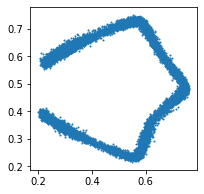

4100 0.001743157859891653
4200 0.0016076669562608004
4300 0.0015906391199678183
4400 0.0015464519383385777
4500 0.001793606556020677
4600 0.0015529039083048701
4700 0.001525414758361876
4800 0.0015512617537751794
4900 0.0015142615884542465
5000 0.0015053116949275136
5100 0.0015466256299987435
5200 0.001532844384200871
5300 0.0015306216664612293
5400 0.001618159469217062
5500 0.0015375572256743908
5600 0.0014554827939718962
5700 0.0015912926755845547
5800 0.0014826066326349974
5900 0.0015236197505146265
6000 0.0014357997570186853


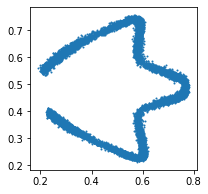

6100 0.0014189588837325573
6200 0.001602791016921401
6300 0.0015164966462180018
6400 0.001420979155227542
6500 0.001405917457304895
6600 0.0015546093927696347
6700 0.0014780759811401367
6800 0.0014818394556641579
6900 0.0014025626005604863
7000 0.0013591969618573785
7100 0.001412733574397862
7200 0.0013953684829175472
7300 0.0014776642201468349
7400 0.0014373816084116697
7500 0.0014326779637485743
7600 0.0014120816485956311
7700 0.0014570403145626187
7800 0.001388626522384584
7900 0.0014341837959364057
8000 0.0015694135800004005


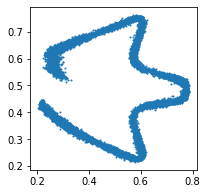

8100 0.001419588690623641
8200 0.0013644301798194647
8300 0.0013193230843171477
8400 0.0013343814061954618
8500 0.0013419640017673373
8600 0.0015210051788017154
8700 0.0014013658510521054
8800 0.0013355766423046589
8900 0.0013648468302562833
9000 0.0012934636324644089
9100 0.0012091692769899964
9200 0.001384108210913837
9300 0.0012299823574721813
9400 0.0012572314590215683
9500 0.001238988945260644
9600 0.0013099975185468793
9700 0.0012245659017935395
9800 0.0012939795851707458
9900 0.0012662981171160936
10000 0.0012934848200529814


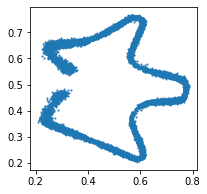

10100 0.001195642282254994
10200 0.001271592453122139
10300 0.0012088482035323977
10400 0.001256985473446548
10500 0.0011309041874483228
10600 0.0010959254577755928
10700 0.0011300730984658003
10800 0.0011591853108257055
10900 0.0012164628133177757
11000 0.0011916134972125292
11100 0.0011548759648576379
11200 0.0011790653225034475
11300 0.0011950153857469559
11400 0.001151197124272585
11500 0.0011675737332552671
11600 0.001090093282982707
11700 0.0011042318074032664
11800 0.001110366894863546
11900 0.0012149824760854244
12000 0.0013040088815614581


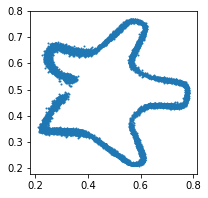

12100 0.00113189488183707
12200 0.0010656798258423805
12300 0.0012209054548293352
12400 0.0012343142880126834
12500 0.0010651902994140983
12600 0.001098288339562714
12700 0.001185943721793592
12800 0.001055336557328701
12900 0.0010949723655357957
13000 0.001049937098287046
13100 0.0010248845210298896
13200 0.0011925750877708197
13300 0.0012291412567719817
13400 0.001071664970368147
13500 0.0010851318947970867
13600 0.0011900935787707567
13700 0.0010013800347223878
13800 0.0010437950259074569
13900 0.00106971082277596
14000 0.0011508157476782799


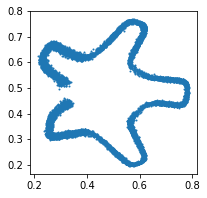

14100 0.0011152304941788316
14200 0.0010407657828181982
14300 0.0010982268722727895
14400 0.0010083358502015471
14500 0.0009976060828194022
14600 0.0010082143126055598
14700 0.0010467527899891138
14800 0.0010529391001909971
14900 0.0010809771483764052
15000 0.0010595396161079407
15100 0.0011225608177483082
15200 0.0011753981234505773
15300 0.0010491380235180259
15400 0.000985381193459034
15500 0.0009763820562511683
15600 0.0009811142226681113
15700 0.0010868699755519629
15800 0.0010600084206089377
15900 0.001036167494021356
16000 0.0010058216284960508


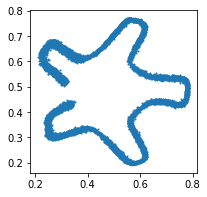

16100 0.0010340448934584856
16200 0.0009868432534858584
16300 0.0010213511995971203
16400 0.0009962909389287233
16500 0.0010482004145160317
16600 0.0010165004059672356
16700 0.0009694592445157468
16800 0.0010015263687819242
16900 0.0009592000860720873
17000 0.0010078061604872346
17100 0.0009815598605200648
17200 0.0010365491034463048
17300 0.0008884160779416561
17400 0.0009914268739521503
17500 0.0009551141411066055
17600 0.0010364701738581061
17700 0.001049624988809228
17800 0.0009625209495425224
17900 0.0009355437941849232
18000 0.0009538953308947384


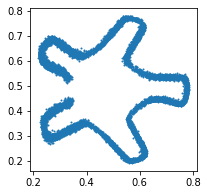

18100 0.0009920401498675346
18200 0.0010366414207965136
18300 0.0011408313876017928
18400 0.0011587804183363914
18500 0.0010077760089188814
18600 0.0009660032228566706
18700 0.0009857844561338425
18800 0.000990093220025301
18900 0.0009535237913951278
19000 0.0009350956534035504
19100 0.0009731297031976283
19200 0.001072971150279045
19300 0.0009654355817474425
19400 0.0009450374636799097
19500 0.0010027902899309993
19600 0.0009629469714127481
19700 0.0009591017733328044
19800 0.0009448506170883775
19900 0.0009535226854495704
20000 0.001062230672687292


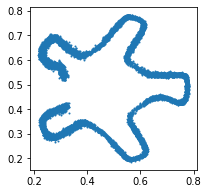

20100 0.0011657748837023973
20200 0.00099886953830719
20300 0.0008631881210021675
20400 0.0009422535658814013
20500 0.0009520863532088697
20600 0.0009188857511617243
20700 0.0009899031138047576
20800 0.0009891721419990063
20900 0.0009110479149967432
21000 0.0009584348299540579
21100 0.0009347081650048494
21200 0.000960454810410738
21300 0.0010026323143392801
21400 0.0009423951851204038
21500 0.0009577509481459856
21600 0.000923191022593528
21700 0.0009709071600809693
21800 0.0009626068058423698
21900 0.0010572678875178099
22000 0.0009011647780425847


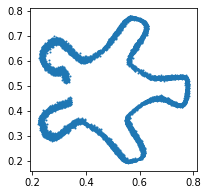

22100 0.0009283837280236185
22200 0.0009355938527733088
22300 0.0010131830349564552
22400 0.0009691381128504872
22500 0.0009235587785951793
22600 0.0009909548098221421
22700 0.0008927772287279367
22800 0.000951052235905081
22900 0.0009526874055154622
23000 0.0009220917709171772
23100 0.0009505123016424477
23200 0.0010263032745569944
23300 0.0009667709236964583
23400 0.0009568872046656907
23500 0.0009503599139861763
23600 0.0008819084032438695
23700 0.0009012389928102493
23800 0.0008988556801341474
23900 0.0009399959235452116
24000 0.000923017505556345


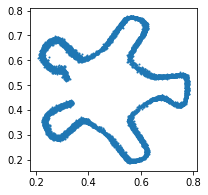

24100 0.0009425065945833921
24200 0.0009490606025792658
24300 0.0009653039742261171
24400 0.0009037443669512868
24500 0.0009098510490730405
24600 0.0009297052165493369
24700 0.0009548906818963587
24800 0.00102439324837178
24900 0.00101569015532732
25000 0.0009755074279382825
25100 0.0009122545015998185
25200 0.0008854055195115507
25300 0.0009971203980967402
25400 0.0009763085399754345
25500 0.0009431478101760149
25600 0.0009363462449982762
25700 0.0010217800736427307
25800 0.0009403480216860771
25900 0.0009975534630939364
26000 0.0009394033113494515


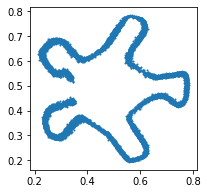

26100 0.0010306661715731025
26200 0.0008627958013676107
26300 0.0009626809041947126
26400 0.0009645377867855132
26500 0.0009046537452377379
26600 0.0008971858769655228
26700 0.0008961582207120955
26800 0.0009047165513038635
26900 0.0011012713657692075
27000 0.0009103051852434874
27100 0.0009307558066211641
27200 0.0009699867223389447
27300 0.0009543102933093905
27400 0.0010654644574970007
27500 0.0008982286090031266
27600 0.0009543176274746656
27700 0.0009236799669452012
27800 0.0010500299977138638
27900 0.0008682647603563964
28000 0.0010523234959691763


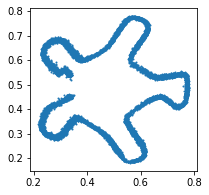

28100 0.0009216837934218347
28200 0.0009175710729323328
28300 0.0009322183323092759
28400 0.0009585266816429794
28500 0.0008811915176920593
28600 0.0008788430714048445
28700 0.0009394010412506759
28800 0.0009636454051360488
28900 0.0008892882033251226
29000 0.0009486013441346586
29100 0.0010010701371356845
29200 0.0009036470437422395
29300 0.0011236921418458223
29400 0.0008867757860571146
29500 0.0009210109710693359
29600 0.0009173083817586303
29700 0.000901411403901875
29800 0.0008877465734258294
29900 0.0009188958792947233
30000 0.0009295993368141353


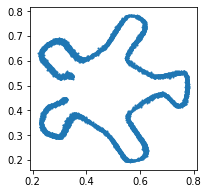

30100 0.0009566474473103881
30200 0.0009879367426037788
30300 0.0011321380734443665
30400 0.0008606511983089149
30500 0.000945564650464803
30600 0.000858516781590879
30700 0.0009517772705294192
30800 0.0009003958548419178
30900 0.0009377411333844066
31000 0.000997760915197432
31100 0.0008905990398488939
31200 0.0009232761221937835
31300 0.0009710126905702055
31400 0.0009362823329865932
31500 0.0008627354400232434
31600 0.0008997819386422634
31700 0.0009499449515715241
31800 0.0008750709239393473
31900 0.0008971116621978581
32000 0.0008956277742981911


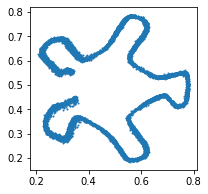

32100 0.0008527744212187827
32200 0.0008062656270340085
32300 0.0008543970179744065
32400 0.0009233856690116227
32500 0.0009150385740213096
32600 0.0008554397500120103
32700 0.0009243076201528311
32800 0.0009446707554161549
32900 0.0009687786805443466
33000 0.0008638722938485444
33100 0.0008572955848649144
33200 0.0008946657180786133
33300 0.0008001075475476682
33400 0.0008991847862489522
33500 0.0008592336671426892
33600 0.0008752738940529525
33700 0.0008939011604525149
33800 0.0008904069545678794
33900 0.0008800741052255034
34000 0.0008217670256271958


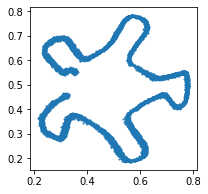

34100 0.0009460740839131176
34200 0.0009469457436352968
34300 0.0009953344706445932
34400 0.0009122432675212622
34500 0.0008708100067451596
34600 0.0008909463649615645
34700 0.000915200391318649
34800 0.0008896031067706645
34900 0.0008752969442866743
35000 0.0008928127936087549
35100 0.0008561979047954082
35200 0.0009329268941655755
35300 0.0009200776694342494
35400 0.0010055172024294734
35500 0.0008984750602394342
35600 0.0008680396713316441
35700 0.0009722991962917149
35800 0.000845638511236757
35900 0.0009184767259284854
36000 0.0009415287640877068


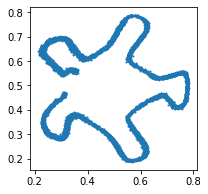

36100 0.0008636355050839484
36200 0.00082976627163589
36300 0.0008733145659789443
36400 0.0009069505613297224
36500 0.0008265661308541894
36600 0.0009262452949769795
36700 0.0009545787470415235
36800 0.0008740053744986653
36900 0.0008609485230408609
37000 0.0010024579241871834
37100 0.000990615808404982
37200 0.000916931894607842
37300 0.0007985928095877171
37400 0.000887181144207716
37500 0.0009363974095322192
37600 0.0007928592967800796
37700 0.0008668365189805627
37800 0.0008469726308248937
37900 0.000990654225461185
38000 0.0008717408054508269


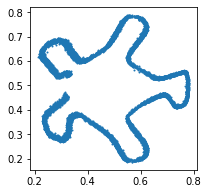

38100 0.0008522231946699321
38200 0.0008441921090707183
38300 0.0009026974439620972
38400 0.0008231265819631517
38500 0.0009111867402680218
38600 0.0008356563630513847
38700 0.000807988632004708
38800 0.0008412992465309799
38900 0.0009653183515183628
39000 0.0009249141439795494
39100 0.0008565593743696809
39200 0.0009438250563107431
39300 0.0008575680549256504
39400 0.0008515030494891107
39500 0.0008168394560925663
39600 0.0008612871170043945
39700 0.0009189120028167963
39800 0.0008433919865638018
39900 0.000834206584841013
40000 0.0007748794159851968


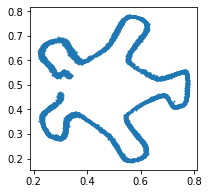

40100 0.0008101821877062321
40200 0.0009334277710877359
40300 0.0008434412884525955
40400 0.0009114925051108003
40500 0.0008645730558782816
40600 0.0009273970499634743
40700 0.0008506345329806209
40800 0.0008898397209122777
40900 0.00085290870629251
41000 0.0008449372835457325
41100 0.0008974939119070768
41200 0.000843861373141408
41300 0.000891545380000025
41400 0.0009022896410897374
41500 0.0008381964289583266
41600 0.000962707563303411
41700 0.0008395586628466845
41800 0.0008664031629450619
41900 0.0009289251174777746
42000 0.0009011148940771818


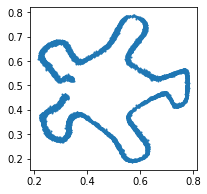

42100 0.0008440354140475392
42200 0.000848528288770467
42300 0.0008434789488092065
42400 0.0010295344982296228
42500 0.0009226739639416337
42600 0.0009268258581869304
42700 0.0008716377196833491
42800 0.00092116161249578
42900 0.0008506673621013761
43000 0.0009628368425182998
43100 0.0008296563755720854
43200 0.0008533335640095174
43300 0.00084162806160748
43400 0.0008142513106577098
43500 0.0008502165437676013
43600 0.0008549104677513242
43700 0.0008628378855064511
43800 0.0008830187725834548
43900 0.0009111689287237823
44000 0.0008523310534656048


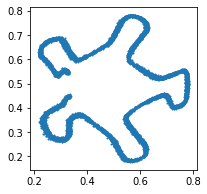

44100 0.0008699891623109579
44200 0.0008299881010316312
44300 0.0007976374472491443
44400 0.0008329401025548577
44500 0.0008607084164395928
44600 0.0008050617179833353
44700 0.0007994578336365521
44800 0.0008481261902488768
44900 0.0008228228543885052
45000 0.0008864624542184174
45100 0.0008262611227110028
45200 0.0010106837144121528
45300 0.0008989698253571987
45400 0.0008439267985522747
45500 0.0010018176399171352
45600 0.0008355870959348977
45700 0.0008902446716092527
45800 0.0007852525450289249
45900 0.0007987524732016027
46000 0.0007938302587717772


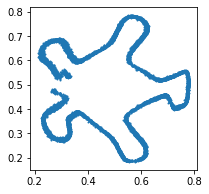

46100 0.0008485637372359633
46200 0.0008211194653995335
46300 0.0009508300572633743
46400 0.0009547044755890965
46500 0.0009518639999441803
46600 0.0007959064096212387
46700 0.000779160822276026
46800 0.0008179281139746308
46900 0.0008239856688305736
47000 0.000903189240489155
47100 0.0008277491433545947
47200 0.0008155832183547318
47300 0.0008583336602896452
47400 0.0008358329650945961
47500 0.0009034074610099196
47600 0.0008028934244066477
47700 0.0008755806484259665
47800 0.0009658734779804945
47900 0.0008156747790053487
48000 0.0007862623315304518


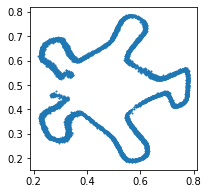

48100 0.000786233227699995
48200 0.0008906392613425851
48300 0.0007756866398267448
48400 0.0008800019859336317
48500 0.00083136250032112
48600 0.0008892971090972424
48700 0.0008053355268202722
48800 0.0007921539363451302
48900 0.0008358755148947239
49000 0.0009132318082265556
49100 0.0008268192177638412
49200 0.0008343830122612417
49300 0.0008710288675501943
49400 0.0008165696053765714
49500 0.000844349677208811
49600 0.0009042969322763383
49700 0.000812078476883471
49800 0.0009336362709291279
49900 0.000844984722789377
50000 0.0007777173887006938


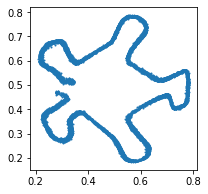

0 0.04552009701728821


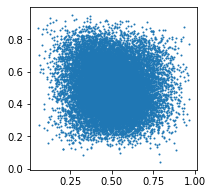

100 0.007424451876431704
200 0.005850228015333414
300 0.004457409027963877
400 0.0038634890224784613
500 0.0034076333977282047
600 0.0034802055452018976
700 0.0035434940364211798
800 0.0030640990007668734
900 0.0030738357454538345
1000 0.0026106543373316526
1100 0.002433336805552244
1200 0.002570362761616707
1300 0.002157517708837986
1400 0.002153337700292468
1500 0.0020960336551070213
1600 0.0026049858424812555
1700 0.0019845603965222836
1800 0.0020078644156455994
1900 0.002137011382728815
2000 0.0019178172806277871


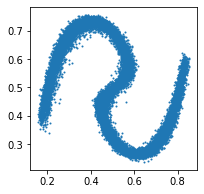

2100 0.0018586543155834079
2200 0.0019506524549797177
2300 0.0018693669699132442
2400 0.00220649060793221
2500 0.0017502341652289033
2600 0.0017582818400114775
2700 0.0022267610765993595
2800 0.001767834066413343
2900 0.0017118701944127679
3000 0.0016899146139621735
3100 0.001621659379452467
3200 0.0020471566822379827
3300 0.0016441213665530086
3400 0.0016923383809626102
3500 0.001571132568642497
3600 0.001699967309832573
3700 0.001650800695642829
3800 0.0016698978142812848
3900 0.0015479535795748234
4000 0.0015592660056427121


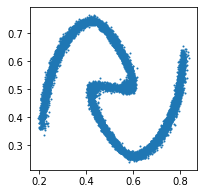

4100 0.0017370196292176843
4200 0.0015768882585689425
4300 0.0016648031305521727
4400 0.0014822101220488548
4500 0.0017170783830806613
4600 0.0014788629487156868
4700 0.0017690955428406596
4800 0.0014315719017758965
4900 0.0015601669438183308
5000 0.0016465793596580625
5100 0.0016046729870140553
5200 0.0015526704955846071
5300 0.001475740922614932
5400 0.0014205389888957143
5500 0.0014019114896655083
5600 0.0013936347095295787
5700 0.0014217420248314738
5800 0.0014838787028566003
5900 0.0014988917391747236
6000 0.0013808478834107518


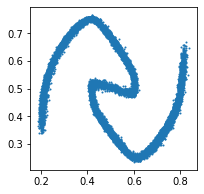

6100 0.0014081059489399195
6200 0.0015181219205260277
6300 0.001536667812615633
6400 0.0014298653695732355
6500 0.0013300563441589475
6600 0.0014478781959041953
6700 0.0014783742371946573
6800 0.001355779473669827
6900 0.0013628265587612987
7000 0.0013867599191144109
7100 0.001380203990265727
7200 0.0014156330144032836
7300 0.0013789371587336063
7400 0.001321593765169382
7500 0.0014564627781510353
7600 0.0013637242373079062
7700 0.001427960116416216
7800 0.0015014928067103028
7900 0.001332487678155303
8000 0.0014222728786990047


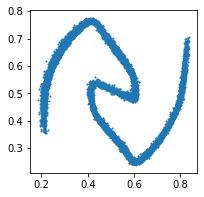

8100 0.001456646015867591
8200 0.0013585744891315699
8300 0.0013831802643835545
8400 0.0015871055657044053
8500 0.0013512213481590152
8600 0.0014374341117218137
8700 0.001375594292767346
8800 0.001296739443205297
8900 0.0015057745622470975
9000 0.0014478700468316674
9100 0.0013260586420074105
9200 0.0012675551697611809
9300 0.0015024663880467415
9400 0.001263048266991973
9500 0.0012880894355475903
9600 0.0014043819392099977
9700 0.0013586286222562194
9800 0.0013280205894261599
9900 0.0012811303604394197
10000 0.0013293909141793847


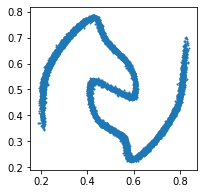

10100 0.0015239272033795714
10200 0.0012326384894549847
10300 0.001225369400344789
10400 0.0013162315590307117
10500 0.0012833316577598453
10600 0.0012375289807096124
10700 0.001308839418925345
10800 0.0012748335720971227
10900 0.0012560171307995915
11000 0.0012596378801390529
11100 0.0012836155947297812
11200 0.0013163909316062927
11300 0.0012972919503226876
11400 0.001325987745076418
11500 0.0013859583996236324
11600 0.0014482238329946995
11700 0.0011781114153563976
11800 0.0012283441610634327
11900 0.0012237222399562597
12000 0.0013787980424240232


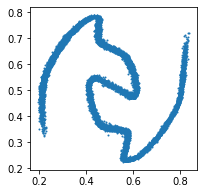

12100 0.0012322101974859834
12200 0.0012087965151295066
12300 0.001216828590258956
12400 0.0013064544182270765
12500 0.0013250295305624604
12600 0.0011817577760666609
12700 0.0011826360132545233
12800 0.0011244690977036953
12900 0.0012467302149161696
13000 0.0013323150342330337
13100 0.001206473563797772
13200 0.0011897726217284799
13300 0.0011771244462579489
13400 0.0012655238388106227
13500 0.0012112952535972
13600 0.0011565827298909426
13700 0.0011990463826805353
13800 0.0012011207873001695
13900 0.001511401031166315
14000 0.0011728813406080008


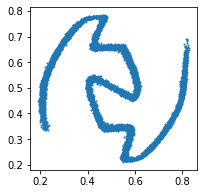

14100 0.001204012893140316
14200 0.0010941728251054883
14300 0.0010963958920910954
14400 0.0012738826917484403
14500 0.0013348670909181237
14600 0.0010788238141685724
14700 0.001098300563171506
14800 0.0011465532006695867
14900 0.0011472394689917564
15000 0.0011925846338272095
15100 0.0010731862857937813
15200 0.0012013826053589582
15300 0.0011548850452527404
15400 0.001138979336246848
15500 0.001138603314757347
15600 0.0011623947648331523
15700 0.0012314827181398869
15800 0.0011159280547872186
15900 0.0011291211703792214
16000 0.0011234220582991838


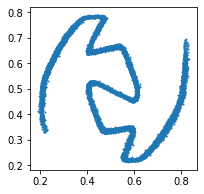

16100 0.0010995599441230297
16200 0.0011014684569090605
16300 0.0010892704594880342
16400 0.001086098374798894
16500 0.0011372880544513464
16600 0.0011443832190707326
16700 0.0010873349383473396
16800 0.0011421439703553915
16900 0.001328366226516664
17000 0.0010459754848852754
17100 0.0011347277322784066
17200 0.0010757754789665341
17300 0.001072144485078752
17400 0.0011428258148953319
17500 0.0011230470845475793
17600 0.001119807711802423
17700 0.0010789179941639304
17800 0.0011138193076476455
17900 0.0011185671901330352
18000 0.0011430546874180436


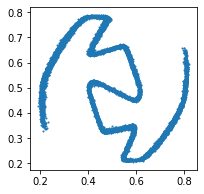

18100 0.0010717569384723902
18200 0.0010816289577633142
18300 0.0010530800791457295
18400 0.0011083035496994853
18500 0.0010515188332647085
18600 0.0010387086076661944
18700 0.0010152460308745503
18800 0.0010184893617406487
18900 0.0010123481042683125
19000 0.0011281947372481227
19100 0.0011040588142350316
19200 0.0011137345572933555
19300 0.0010659305844455957
19400 0.00101227848790586
19500 0.0010584124829620123
19600 0.0012145048240199685
19700 0.0011609233915805817
19800 0.0010110273724421859
19900 0.0011869949521496892
20000 0.0010464151855558157


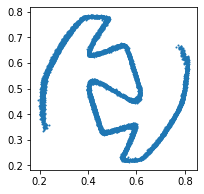

20100 0.0011143890442326665
20200 0.0010280676651746035
20300 0.0010164218256250024
20400 0.0010966851841658354
20500 0.0012187431566417217
20600 0.0010757147101685405
20700 0.0011822867672890425
20800 0.0010168877197429538
20900 0.0009872645605355501
21000 0.0010081478394567966
21100 0.0010037682950496674
21200 0.001041151350364089
21300 0.0010598129592835903
21400 0.0010539523791521788
21500 0.0009681430528871715
21600 0.0010362023022025824
21700 0.0011042245896533132
21800 0.0010516970651224256
21900 0.0010309371864423156
22000 0.0011583665618672967


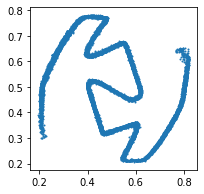

22100 0.0009860858554020524
22200 0.0010088480776175857
22300 0.001010240986943245
22400 0.0010770322987809777
22500 0.00108193454798311
22600 0.001068729325197637
22700 0.0009694045875221491
22800 0.0009901096345856786
22900 0.0009830838534981012
23000 0.0010015923762694001
23100 0.0010870160767808557
23200 0.0009695363696664572
23300 0.001037277397699654
23400 0.001039520837366581
23500 0.0010108387796208262
23600 0.0011183902388438582
23700 0.0011013303883373737
23800 0.0009731819154694676
23900 0.00099691201467067
24000 0.0009988935198634863


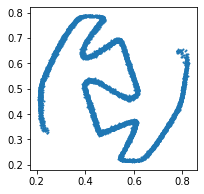

24100 0.0009587121894583106
24200 0.0009503206820227206
24300 0.0010262622963637114
24400 0.0010918822372332215
24500 0.0010203237179666758
24600 0.0010609154123812914
24700 0.0010391612304374576
24800 0.0009593259310349822
24900 0.0009379418333992362
25000 0.0009429935016669333
25100 0.0009291923488490283
25200 0.0010209569009020925
25300 0.0010135580087080598
25400 0.0010099459905177355
25500 0.0009125687647610903
25600 0.0009468416683375835
25700 0.0009714850457385182
25800 0.0009311645408160985
25900 0.0011201701126992702
26000 0.0009251368464902043


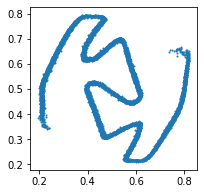

26100 0.0010907826945185661
26200 0.001000140211544931
26300 0.0008959897677414119
26400 0.0009726269636303186
26500 0.0010153047041967511
26600 0.000985909253358841
26700 0.0009612038265913725
26800 0.0010116779012605548
26900 0.0009561137994751334
27000 0.0009521133033558726
27100 0.0009726603166200221
27200 0.0009484371985308826
27300 0.0008972680661827326
27400 0.0009287775028496981
27500 0.0009491840028204024
27600 0.0009325746214017272
27700 0.0010481373174116015
27800 0.000916720659006387
27900 0.0008939288090914488
28000 0.001043579075485468


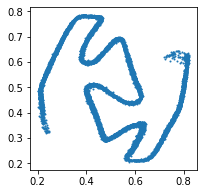

28100 0.0009097806760109961
28200 0.0009103698539547622
28300 0.000905851717106998
28400 0.0009556816075928509
28500 0.0009365077712573111
28600 0.0009722319082356989
28700 0.000934399024117738
28800 0.0008891311590559781
28900 0.001040278933942318
29000 0.0010190019384026527
29100 0.0009801776614040136
29200 0.0010150419548153877
29300 0.000927318527828902
29400 0.0009965667268261313
29500 0.0008986087632365525
29600 0.0009326707804575562
29700 0.0010427284287288785
29800 0.0010896397288888693
29900 0.0009700804366730154
30000 0.0009361537522636354


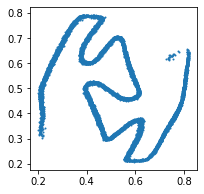

30100 0.0008642797474749386
30200 0.0009692666935734451
30300 0.0009451644727960229
30400 0.0009063332108780742
30500 0.0009410222992300987
30600 0.0011289599351584911
30700 0.0009145275107584894
30800 0.0009502918692305684
30900 0.0009717923821881413
31000 0.0009604876977391541
31100 0.0009504978079348803
31200 0.0010056101018562913
31300 0.0008681784383952618
31400 0.0009236476616933942
31500 0.0009193099685944617
31600 0.0008905691793188453
31700 0.0009741397807374597
31800 0.0009424509480595589
31900 0.0009401237475685775
32000 0.0008907070150598884


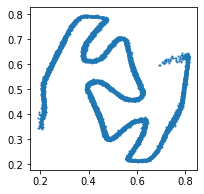

32100 0.0008996727992780507
32200 0.0008944415603764355
32300 0.0008949171751737595
32400 0.0009701188537292182
32500 0.0008788214181549847
32600 0.0008835610933601856
32700 0.0009745428105816245
32800 0.0008803436066955328
32900 0.001019359682686627
33000 0.0008974988595582545
33100 0.0009118887828662992
33200 0.0009157850290648639
33300 0.0010393484262749553
33400 0.00111432746052742
33500 0.000896602519787848
33600 0.0008578893612138927
33700 0.0008770783897489309
33800 0.0009281439706683159
33900 0.0009153308346867561
34000 0.0009381182608194649


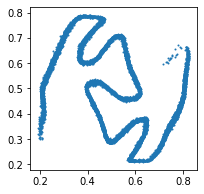

34100 0.0009193707956001163
34200 0.0009213897283188999
34300 0.000883540022186935
34400 0.0008715736912563443
34500 0.0009338099043816328
34600 0.0009255144977942109
34700 0.0008773548761382699
34800 0.0008802553056739271
34900 0.000901687191799283
35000 0.0008872631005942822
35100 0.0008494365611113608
35200 0.000919535115826875
35300 0.0008795525063760579
35400 0.0009012597147375345
35500 0.0009486142662353814
35600 0.000893696560524404
35700 0.0008709713583812118
35800 0.0009280963568016887
35900 0.0008862526738084853
36000 0.0009184328955598176


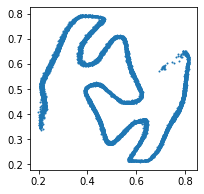

36100 0.000855070655234158
36200 0.0009173471480607986
36300 0.0009577872697263956
36400 0.0008832290186546743
36500 0.0010156575590372086
36600 0.0008758447365835309
36700 0.0008819864015094936
36800 0.0008897560182958841
36900 0.0008849230362102389
37000 0.0009143861825577915
37100 0.0008817674242891371
37200 0.0008892045589163899
37300 0.000901357620023191
37400 0.0008859781082719564
37500 0.0009123527561314404
37600 0.0008606819901615381
37700 0.0008694236748851836
37800 0.0008629165240563452
37900 0.0008680380415171385
38000 0.0009618696058169007


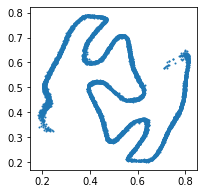

38100 0.00098607933614403
38200 0.000866252405103296
38300 0.0008768303669057786
38400 0.0008718743920326233
38500 0.000890887517016381
38600 0.0008386447443626821
38700 0.0009211708093062043
38800 0.0009133871062658727
38900 0.0008706520893611014
39000 0.0008486495935358107
39100 0.0009244332322850823
39200 0.0008538028341718018
39300 0.0009214931051246822
39400 0.0008847110439091921
39500 0.0008790586143732071
39600 0.0010306298499926925
39700 0.0009138260502368212
39800 0.0008650814997963607
39900 0.0008614156395196915
40000 0.0009304803679697216


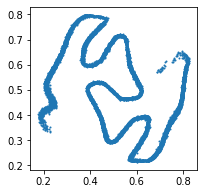

40100 0.0008815938490442932
40200 0.00085450493497774
40300 0.0008904257556423545
40400 0.0009317676303908229
40500 0.0008849077275954187
40600 0.0008219029987230897
40700 0.0008529079495929182
40800 0.0008755619055591524
40900 0.0008764450903981924
41000 0.0008531274506822228
41100 0.0009408351616002619
41200 0.0008189914515241981
41300 0.0008737544994801283
41400 0.0008222295437008142
41500 0.0008624152978882194
41600 0.0008432783652096987
41700 0.0008599347784183919
41800 0.0008876134525053203
41900 0.0008934355573728681
42000 0.0008519918192178011


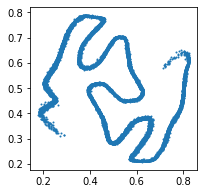

42100 0.0008694326388649642
42200 0.0008973082294687629
42300 0.000942098384257406
42400 0.0008806284749880433
42500 0.0008472406188957393
42600 0.0008269199170172215
42700 0.0009088641963899136
42800 0.0008329036645591259
42900 0.0008782359655015171
43000 0.0008596357074566185
43100 0.0009155437001027167
43200 0.0008425721898674965
43300 0.0008369760471396148
43400 0.000859523774124682
43500 0.0008491266053169966
43600 0.0008476720540784299
43700 0.0009025322506204247
43800 0.0008463753620162606
43900 0.0008776222239248455
44000 0.0008306268719024956


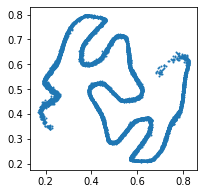

44100 0.0009326755534857512
44200 0.0008289464749395847
44300 0.0008471828186884522
44400 0.0008870762540027499
44500 0.0008186486084014177
44600 0.0008707305532880127
44700 0.0008183081517927349
44800 0.0007704059244133532
44900 0.0008852455648593605
45000 0.0008315093000419438
45100 0.0007880443590693176
45200 0.0009265873814001679
45300 0.0009899958968162537
45400 0.0008477751398459077
45500 0.0009335014037787914
45600 0.0008508622995577753
45700 0.0008961988496594131
45800 0.0008459851960651577
45900 0.0008491717162542045
46000 0.0008304502116516232


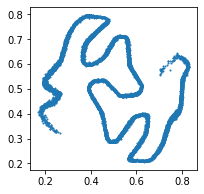

46100 0.0009729819721542299
46200 0.0008189859217964113
46300 0.0008265688666142523
46400 0.0008291483391076326
46500 0.0007826725486665964
46600 0.0008482492412440479
46700 0.0007905298843979836
46800 0.0008440236561000347
46900 0.0009477147832512856
47000 0.0008088290924206376
47100 0.000792582577560097
47200 0.000920237333048135
47300 0.0008721523336134851
47400 0.0007889125845395029
47500 0.0007968107820488513
47600 0.0009752057958394289
47700 0.0009038602584041655
47800 0.0008644229383207858
47900 0.0008375613833777606
48000 0.0008940927218645811


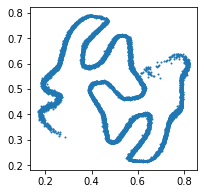

48100 0.0008663738262839615
48200 0.0008204730693250895
48300 0.0008320685010403395
48400 0.0009139408939518034
48500 0.0009024349274113774
48600 0.0008836333872750401
48700 0.0008104686276055872
48800 0.0008184272446669638
48900 0.0008721625781618059
49000 0.0009059797157533467
49100 0.000781666545663029
49200 0.0008559279958717525
49300 0.0008780303760431707
49400 0.0007854918367229402
49500 0.000857748556882143
49600 0.0008008456788957119
49700 0.0008608999196439981
49800 0.0008410142618231475
49900 0.0008331562858074903
50000 0.0008275492582470179


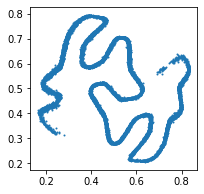

0 0.027766820043325424


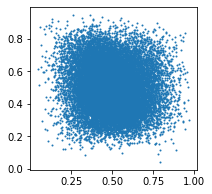

100 0.003916324581950903
200 0.003304070560261607
300 0.0025895193684846163
400 0.0022744990419596434
500 0.0023143019061535597
600 0.002326648449525237
700 0.002029870171099901
800 0.0021499262657016516
900 0.0018080329755321145
1000 0.0018001353600993752
1100 0.001612093299627304
1200 0.001741057145409286
1300 0.0017436774214729667
1400 0.0016325154574587941
1500 0.001648000325076282
1600 0.0016550773289054632
1700 0.001596323330886662
1800 0.0016054321313276887
1900 0.001467160414904356
2000 0.0015115474816411734


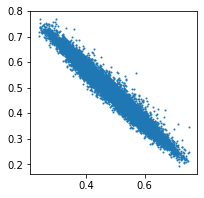

2100 0.001505102845840156
2200 0.0015146880177780986
2300 0.0015075174160301685
2400 0.0015308702131733298
2500 0.0015158785972744226
2600 0.0014711424009874463
2700 0.001461005536839366
2800 0.0014587834011763334
2900 0.001402584952302277
3000 0.001449373783543706
3100 0.0014459940139204264
3200 0.001423092558979988
3300 0.0014498250093311071
3400 0.001431330805644393
3500 0.001404759124852717
3600 0.001411090837791562
3700 0.0014013153268024325
3800 0.001414160244166851
3900 0.0013905131490901113
4000 0.001402362366206944


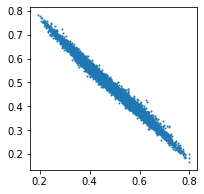

4100 0.0013956219190731645
4200 0.0013835006393492222
4300 0.0013511560391634703
4400 0.0014050952158868313
4500 0.0013607038417831063
4600 0.0013646860606968403
4700 0.0013699928531423211
4800 0.0013866315130144358
4900 0.0013492756988853216
5000 0.0013763261958956718
5100 0.001360311871394515
5200 0.0013481067726388574
5300 0.0013437604065984488
5400 0.0013631852343678474
5500 0.001362108625471592
5600 0.0013831848045811057
5700 0.0013173007173463702
5800 0.0013379976153373718
5900 0.001377619570121169
6000 0.0013714279048144817


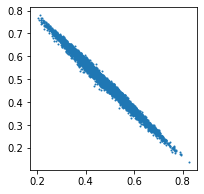

6100 0.0013566649286076427
6200 0.0013518513878807425
6300 0.0013497949112206697
6400 0.0013612157199531794
6500 0.0013261468848213553
6600 0.00135803094599396
6700 0.0013250113697722554
6800 0.0013273662189021707
6900 0.0013447294477373362
7000 0.0013352970127016306
7100 0.001359610934741795
7200 0.0013301856815814972
7300 0.001350637641735375
7400 0.0013456972083076835
7500 0.0013374387053772807
7600 0.0013387256767600775
7700 0.0013420465402305126
7800 0.0013277580728754401
7900 0.0013167629949748516
8000 0.0013003370258957148


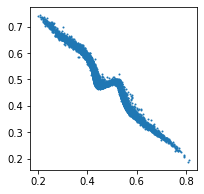

8100 0.0011669570812955499
8200 0.0011630674125626683
8300 0.0011164378374814987
8400 0.0010666530579328537
8500 0.0010787446517497301
8600 0.0009850423084571958
8700 0.0009803808061406016
8800 0.0009575507720001042
8900 0.0009662986267358065
9000 0.0009970804676413536
9100 0.0009104401106014848
9200 0.0009109231759794056
9300 0.0009478006977587938
9400 0.0009198668994940817
9500 0.0008395477198064327
9600 0.0009441754082217813
9700 0.0010031601414084435
9800 0.0008430336602032185
9900 0.0009450250654481351
10000 0.0008341619977727532


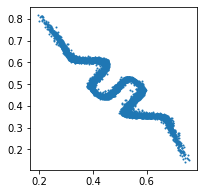

10100 0.0007987041026353836
10200 0.0008750137058086693
10300 0.0008520500850863755
10400 0.0008457425865344703
10500 0.0007527515408582985
10600 0.0008145961328409612
10700 0.0008899808744899929
10800 0.000792470935266465
10900 0.0007547661662101746
11000 0.0007715732790529728
11100 0.0007990022422745824
11200 0.0007970347069203854
11300 0.0007340665906667709
11400 0.0007299701101146638
11500 0.0007350581581704319
11600 0.000731446489226073
11700 0.0007033635629341006
11800 0.0007713555824011564
11900 0.0007275374373421073
12000 0.0006706746644340456


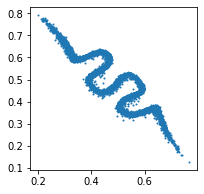

12100 0.0007101429509930313
12200 0.000714828260242939
12300 0.0006715126801282167
12400 0.0006619292544201016
12500 0.00072498555528
12600 0.0007021016790531576
12700 0.0008046251023188233
12800 0.0007307771593332291
12900 0.0006439941935241222
13000 0.0006984792416915298
13100 0.0006956846336834133
13200 0.0006933887489140034
13300 0.0006474428810179234
13400 0.0006551207625307143
13500 0.0006714834016747773
13600 0.0006420258432626724
13700 0.0006375389639288187
13800 0.000704882200807333
13900 0.0007609127787873149
14000 0.0006355097866617143


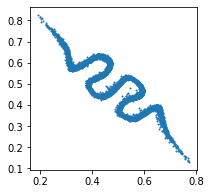

14100 0.0006195683963596821
14200 0.0006432500667870045
14300 0.0006489736260846257
14400 0.0006304330890998244
14500 0.0006403107545338571
14600 0.000658807170111686
14700 0.0006479998701252043
14800 0.0006309127202257514
14900 0.000666306063067168
15000 0.0005987638724036515
15100 0.0005980712012387812
15200 0.0006007383926771581
15300 0.0007308924687094986
15400 0.0006027280469425023
15500 0.000624088104814291
15600 0.0006838623085059226
15700 0.000597859441768378
15800 0.000581457104999572
15900 0.0006108996458351612
16000 0.0005767917609773576


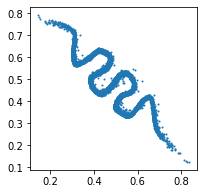

16100 0.0006287667201831937
16200 0.0005785274552181363
16300 0.0005973317893221974
16400 0.000571334850974381
16500 0.0005788391572423279
16600 0.0005437416839413345
16700 0.0006058146245777607
16800 0.0005573920207098126
16900 0.0006790581974200904
17000 0.0005863754195161164
17100 0.0005351970321498811
17200 0.0005648522055707872
17300 0.0005445602000690997
17400 0.0005859266384504735
17500 0.0005569683271460235
17600 0.0005521650309674442
17700 0.0005767024122178555
17800 0.0005703007336705923
17900 0.0005444748676382005
18000 0.0005435608909465373


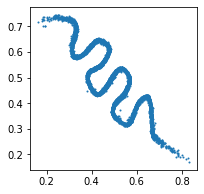

18100 0.0005553330993279815
18200 0.0005463802954182029
18300 0.0005906724836677313
18400 0.000556722457986325
18500 0.0005653352709487081
18600 0.0005359033239074051
18700 0.0005389664438553154
18800 0.0005481398547999561
18900 0.0005897152586840093
19000 0.0005596312112174928
19100 0.0005434387130662799
19200 0.0005509781185537577
19300 0.0005514258518815041
19400 0.000561795081011951
19500 0.0005498402169905603
19600 0.0005077251116745174
19700 0.0005232553812675178
19800 0.0005375033942982554
19900 0.0004978427896276116
20000 0.0005174129619263113


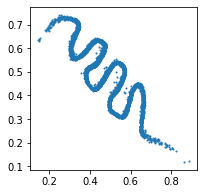

20100 0.0006112235132604837
20200 0.0005301719647832215
20300 0.00047739798901602626
20400 0.0005517553072422743
20500 0.0005513545474968851
20600 0.0005031749606132507
20700 0.0005605316255241632
20800 0.0005074595683254302
20900 0.0004684269370045513
21000 0.0005314290174283087
21100 0.0005689957761205733
21200 0.0005544416490010917
21300 0.0004945893306285143
21400 0.000504356634337455
21500 0.0005409771110862494
21600 0.000499708519782871
21700 0.0005570200155489147
21800 0.0004919046186842024
21900 0.0004898120532743633
22000 0.0005306662642396986


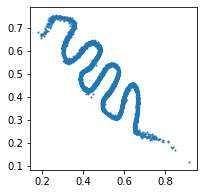

22100 0.00046850083163008094
22200 0.0004905573441646993
22300 0.0004891495918855071
22400 0.0005186007474549115
22500 0.000480863091070205
22600 0.000445791200036183
22700 0.0004780414456035942
22800 0.0004507518606260419
22900 0.000512298836838454
23000 0.0005076533416286111
23100 0.00047735869884490967
23200 0.00048495910596102476
23300 0.0005091492785140872
23400 0.0004549477598629892
23500 0.0004719058924820274
23600 0.0005041874828748405
23700 0.000530686869751662
23800 0.00046165974345058203
23900 0.0004884984227828681
24000 0.0005038807867094874


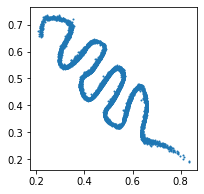

24100 0.0004706005856860429
24200 0.00047711399383842945
24300 0.0004631140036508441
24400 0.0004482614458538592
24500 0.00047990644816309214
24600 0.00044029438868165016
24700 0.00046524094068445265
24800 0.0004710631328634918
24900 0.0004745242476928979
25000 0.0004332047246862203
25100 0.00043114498839713633
25200 0.00047272967640310526
25300 0.00043832071241922677
25400 0.0004457900067791343
25500 0.0004852452257182449
25600 0.00044527556747198105
25700 0.0005032233311794698
25800 0.00044171427725814283
25900 0.00043107193778268993
26000 0.0004793409607373178


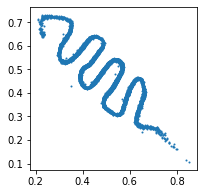

26100 0.0005192954558879137
26200 0.0005024719866923988
26300 0.00043287494918331504
26400 0.0004914635792374611
26500 0.00044788626837544143
26600 0.0004233787767589092
26700 0.00044863176299259067
26800 0.0004411432601045817
26900 0.00044158296077512205
27000 0.0004497804620768875
27100 0.00041668579797260463
27200 0.0005019853706471622
27300 0.00045261200284585357
27400 0.0004675655800383538
27500 0.00045001652324572206
27600 0.0004450242849998176
27700 0.00043297038064338267
27800 0.0004236716195009649
27900 0.00048570017679594457
28000 0.0004309149517212063


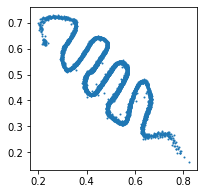

28100 0.00042611893150024116
28200 0.0004246922326274216
28300 0.00041857929318211973
28400 0.0004886365495622158
28500 0.0004096296615898609
28600 0.0004225358716212213
28700 0.0004362519539427012
28800 0.0004437565803527832
28900 0.00043636883492581546
29000 0.00043642509263008833
29100 0.00042831606697291136
29200 0.0004324654000811279
29300 0.0004093130410183221
29400 0.00040210894076153636
29500 0.0004790554812643677
29600 0.000471494480734691
29700 0.0004203897842671722
29800 0.000459413742646575
29900 0.00042756140464916825
30000 0.0003921216994058341


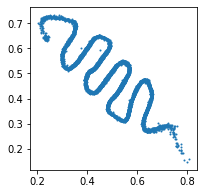

30100 0.00044948310824111104
30200 0.00045034088543616235
30300 0.0004461292119231075
30400 0.0003891762753482908
30500 0.0004262336587999016
30600 0.00044965394772589207
30700 0.0004298634303268045
30800 0.00044974821503274143
30900 0.0004982815589755774
31000 0.000447625236120075
31100 0.0004453356086742133
31200 0.0004314513935241848
31300 0.0004004722577519715
31400 0.00042701372876763344
31500 0.00039436103543266654
31600 0.0004105780099052936
31700 0.0004032095312140882
31800 0.00040804510354064405
31900 0.0004041215870529413
32000 0.00040035651181824505


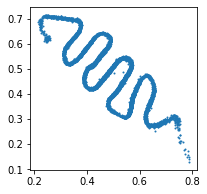

32100 0.00041478866478428245
32200 0.0003882682358380407
32300 0.0005160120199434459
32400 0.00042600659071467817
32500 0.00045434435014612973
32600 0.00040483372868038714
32700 0.0004305748734623194
32800 0.00039147265488281846
32900 0.0003978565218858421
33000 0.0004046661197207868
33100 0.00039825632120482624
33200 0.0004386315122246742
33300 0.0004203756107017398
33400 0.00044788894592784345
33500 0.000412923312978819
33600 0.0004308357019908726
33700 0.00037982649519108236
33800 0.0004049011622555554
33900 0.0003901915333699435
34000 0.0003996936429757625


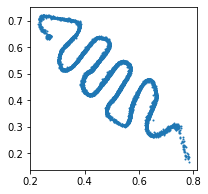

34100 0.0004862421774305403
34200 0.00036747046397067606
34300 0.000408592022722587
34400 0.0004042781365569681
34500 0.0004096567863598466
34600 0.000402981648221612
34700 0.0004004498478025198
34800 0.0003952555125579238
34900 0.00042044295696541667
35000 0.00039673151331953704
35100 0.0004044296219944954
35200 0.0004057455516885966
35300 0.0004496554611250758
35400 0.0003720078384503722
35500 0.0003786541929002851
35600 0.0004400148172862828
35700 0.00038586847949773073
35800 0.0004099851939827204
35900 0.0004274422535672784
36000 0.00040107325185090303


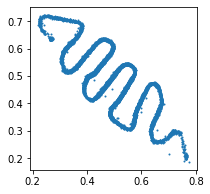

36100 0.0003896685957442969
36200 0.00039729056879878044
36300 0.00040290987817570567
36400 0.0004000192566309124
36500 0.0004147802828811109
36600 0.0003735079080797732
36700 0.00043125622323714197
36800 0.0004202623385936022
36900 0.0004030269046779722
37000 0.00038492202293127775
37100 0.00039942024159245193
37200 0.0003804174775723368
37300 0.00039936788380146027
37400 0.00038921122904866934
37500 0.00037024615448899567
37600 0.00037444362533278763
37700 0.0004231931234244257
37800 0.00044037846964783967
37900 0.00037203149986453354
38000 0.000377252756152302


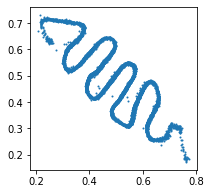

38100 0.0004078592173755169
38200 0.0003620522329583764
38300 0.0003940525057259947
38400 0.00038095086347311735
38500 0.00036810917663387954
38600 0.00038060839870013297
38700 0.00040898731094785035
38800 0.0003705713606905192
38900 0.0003896285779774189
39000 0.0003660615475382656
39100 0.00038115476490929723
39200 0.00038949819281697273
39300 0.00039176654536277056
39400 0.0003688294382300228
39500 0.0004089830326847732
39600 0.0003739184467121959
39700 0.0003701089881360531
39800 0.0004110703303012997
39900 0.0004008521791547537
40000 0.0003792937786784023


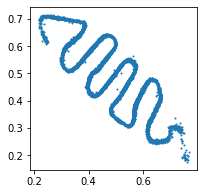

40100 0.0003648995771072805
40200 0.0003797708486672491
40300 0.00041157740633934736
40400 0.0003702915564645082
40500 0.00037147855618968606
40600 0.00036783007089979947
40700 0.000399665703298524
40800 0.00037804958992637694
40900 0.00036079681012779474
41000 0.00038404171937145293
41100 0.00037976072053425014
41200 0.0003903404576703906
41300 0.000380964222131297
41400 0.0003876793780364096
41500 0.00037954695289954543
41600 0.0003999942564405501
41700 0.00040593603625893593
41800 0.0003658939094748348
41900 0.0004074272874277085
42000 0.0003658993518911302


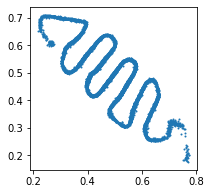

42100 0.0003532811824698001
42200 0.0004048412083648145
42300 0.00036266117240302265
42400 0.0003646952973213047
42500 0.0003675674379337579
42600 0.00040410211659036577
42700 0.00038627503090538085
42800 0.00034633002360351384
42900 0.00040001285378821194
43000 0.0003644935495685786
43100 0.0003829812922049314
43200 0.0003514701675157994
43300 0.00036490755155682564
43400 0.0004196761583443731
43500 0.0003752225893549621
43600 0.00035291805397719145
43700 0.0003828857734333724
43800 0.0003467874776106328
43900 0.00035377987660467625
44000 0.0003726533323060721


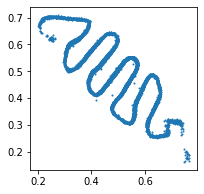

44100 0.0003549398679751903
44200 0.00040236656786873937
44300 0.00034410791704431176
44400 0.0003475522098597139
44500 0.0003392580838408321
44600 0.00035054178442806005
44700 0.00037687673466280103
44800 0.0003615153254941106
44900 0.00042209328967146575
45000 0.00036823528353124857
45100 0.00035311427200213075
45200 0.00036612985422834754
45300 0.0003782146086450666
45400 0.0003699710068758577
45500 0.0004155664355494082
45600 0.000371517933672294
45700 0.00039176689460873604
45800 0.00035433564335107803
45900 0.0003293955232948065
46000 0.00037216185592114925


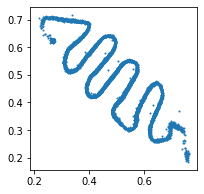

46100 0.0003538911114446819
46200 0.0003558723838068545
46300 0.00033462693681940436
46400 0.0003430663200560957
46500 0.00035175131051801145
46600 0.0003424914029892534
46700 0.0003507427463773638
46800 0.0003639381902758032
46900 0.0003778171958401799
47000 0.0003590304695535451
47100 0.0003556764859240502
47200 0.0003395098610781133
47300 0.00037100122426636517
47400 0.00036483543226495385
47500 0.0003437652485445142
47600 0.00037579279160127044
47700 0.0003960862522944808
47800 0.00033863214775919914
47900 0.00035301619209349155
48000 0.0003385614836588502


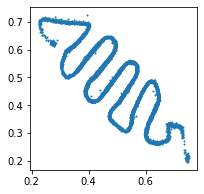

48100 0.0003611246356740594
48200 0.00039416420622728765
48300 0.00035435540485195816
48400 0.0003429850621614605
48500 0.00037533530849032104
48600 0.00034165449324063957
48700 0.00036391004687175155
48800 0.0003538078744895756
48900 0.00036521366564556956
49000 0.00034491930273361504
49100 0.0003511328250169754
49200 0.00034297595266252756
49300 0.00036843327688984573
49400 0.00037728945608250797
49500 0.0003412476507946849
49600 0.0003452605160418898
49700 0.00034274367499165237
49800 0.00035127013688907027
49900 0.0003650295257102698
50000 0.0003530877293087542


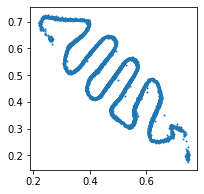

In [17]:
save_centers = []

for k in [0, 1, 2]:
    
    train_data = run_dataset[k]

    torch.cuda.set_device(0)

    def gauss(A,B,var):
        return torch.exp(-((A.unsqueeze(1) - B.unsqueeze(0))**2).mean(2)/(2*var))

    torch.manual_seed(0)
    np.random.seed(0)

    E = encoder(input_dim = 2, out_dim = 1).cuda()
    D = decoder(input_dim = 1, out_dim = 2).cuda()

    optimizer_E = optim.Adam([
          {'params': E.parameters(), 'lr': 0.0001, 'betas': (0.5, 0.9)},
       ])

    optimizer_D = optim.Adam([
          {'params': D.parameters(), 'lr': 0.0001, 'betas': (0.5, 0.9)},
       ])

    error_curve = []

    for i in range(0, 50001):

        b1 = np.random.choice(train_data.shape[0], 20000)
        batch_data = torch.from_numpy(train_data[b1]).float().cuda()

        encoded = E(batch_data)
        decoded = D(encoded)

        error = ((decoded - batch_data)**2).mean(-1).mean(0)
        error.backward()
        error_curve.append(error.item())

        optimizer_E.step()
        optimizer_D.step()

        optimizer_E.zero_grad()
        optimizer_D.zero_grad()

        if i % 100 == 0:
            print(i, error.item())

            if i%2000 == 0:
                E.eval()
                D.eval()

                decoded = decoded.detach().cpu()
                plt.figure(figsize=(3, 3))
                plt.scatter(decoded[:, 0], decoded[:, 1], s=1)
                plt.show()

                E.train()
                D.train()
    
    decoded = decoded.detach().cpu().numpy()
    save_centers.append(decoded)

In [22]:
# np.save('save_centers_2.npy', np.stack(save_centers))

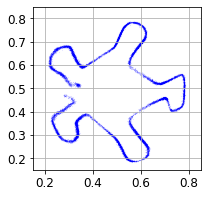

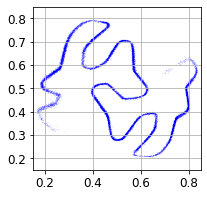

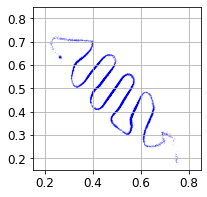

In [56]:
from matplotlib.font_manager import FontProperties
import seaborn as sns

def print_figures(centers, k):
    fig, ax = plt.subplots(figsize=(3, 3))
    
    plt.scatter(centers[:, 0], centers[:, 1], s=.001, c='blue', rasterized=True)
    
    bold_font = FontProperties()
#     bold_font.set_weight('bold')
    bold_font.set_size(12)
#     sns.despine(trim=True, offset=5)

    for label in ax.get_xticklabels():
        label.set_fontproperties(bold_font)

    # Set tick labels to bold for the y-axis
    for label in ax.get_yticklabels():
        label.set_fontproperties(bold_font)
    
    plt.xlim(0.15, 0.85)
    plt.ylim(0.15, 0.85)
    
    plt.grid('None')

    plt.savefig('{0}.pdf'.format(k),bbox_inches='tight', dpi=500)
    
    plt.show()
    
# print_figures(save_centers[0], 0)
# print_figures(save_centers[1], 1)
# print_figures(save_centers[2], 2)

print_figures(save_centers[0], 0)
print_figures(save_centers[1], 1)
print_figures(save_centers[2], 2)

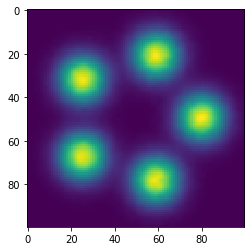

0 -22.099344016456065


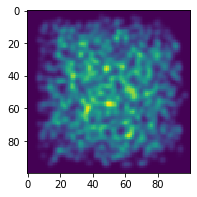

100 -11.419032442239805
200 -4.050220369994977
300 -2.498039020504446
400 -1.7361756270757986
500 -1.3693742621720582
600 -1.2368206403660515
700 -1.131516049456263
800 -1.0555034512264054
900 -0.9962628583736229
1000 -1.0176478308818597


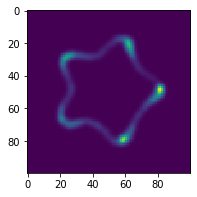

1100 -0.9498475945111807
1200 -0.9334081553423103
1300 -0.8876506110604268
1400 -0.8703631717308908
1500 -0.8234587123227544
1600 -0.7916166724923824
1700 -0.8058530725022389
1800 -0.7903983647313609
1900 -0.755278551225786
2000 -0.7874284532683409


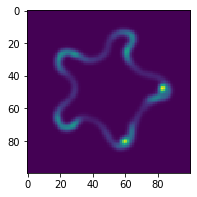

2100 -0.7623743975635102
2200 -0.7208534031579253
2300 -0.7332057868242213
2400 -0.696660934379201
2500 -0.7237413350672877
2600 -0.697494501453699
2700 -0.7046814051086352
2800 -0.6961151274014717
2900 -0.6751435615650077
3000 -0.6738653198629139


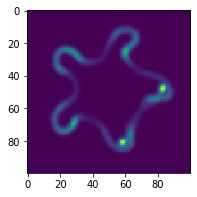

3100 -0.6487160757707855
3200 -0.6692906159253512
3300 -0.6480348838779009
3400 -0.6690915140165454
3500 -0.649108045757686
3600 -0.6606092818071364
3700 -0.6279795129422682
3800 -0.6231668966229481
3900 -0.6447307260274069
4000 -0.6323703428982176


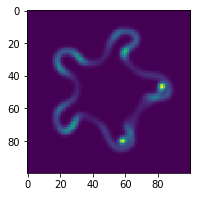

4100 -0.6392528811168092
4200 -0.6210175303753631
4300 -0.6356541460417044
4400 -0.6265864302726405
4500 -0.6072907221935921
4600 -0.6316346979158807
4700 -0.6104132921989811
4800 -0.6096878928912652
4900 -0.6167027877574638
5000 -0.6091665707411206


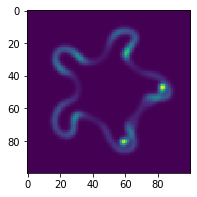

5100 -0.596355493233042
5200 -0.6125235327895387
5300 -0.6208381304815134
5400 -0.592541333606986
5500 -0.6095374248804187
5600 -0.6039688826386072
5700 -0.6169911172825706
5800 -0.6126442278154028
5900 -0.6183876121330264
6000 -0.5890379534641995


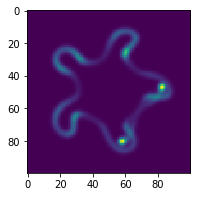

6100 -0.5872058557779787
6200 -0.5707442218005689
6300 -0.5867530671492147
6400 -0.5959028300678341
6500 -0.6230499608900362
6600 -0.6200676536464604
6700 -0.6159952701890763
6800 -0.6093037227097287
6900 -0.6019690272832638
7000 -0.5654540252984755


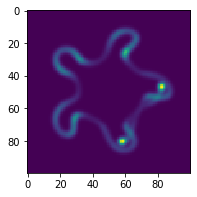

7100 -0.5915767074876357
7200 -0.5925803744102162
7300 -0.6332118317070832
7400 -0.6244023548839504
7500 -0.6096930470398727
7600 -0.6054316534417993
7700 -0.6091739512184178
7800 -0.592348990207006
7900 -0.621138471799614
8000 -0.6519621963636785


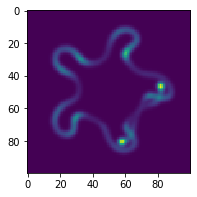

8100 -0.6369871874285625
8200 -0.6384995774714798
8300 -0.649874195450348
8400 -0.6200200748742843
8500 -0.6022877990236697
8600 -0.5945395569324019
8700 -0.6010057977586889
8800 -0.6088342848645677
8900 -0.6259937268561445
9000 -0.6370770220317563


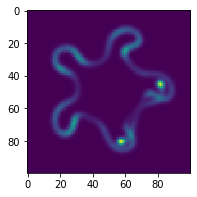

9100 -0.5953015278698879
9200 -0.5942915927022021
9300 -0.6332217838013708
9400 -0.6654796387349635
9500 -0.6402849302623554
9600 -0.630998871546239
9700 -0.6172419562098594
9800 -0.6232046837909418
9900 -0.6249152023912666
10000 -0.6329463115096967


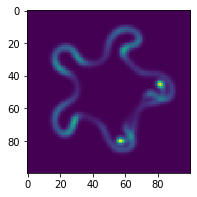

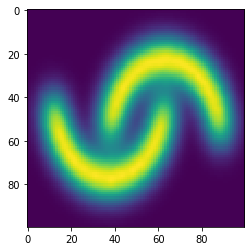

0 -21.230232708637864


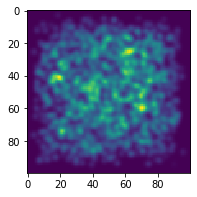

100 -6.205983371801249
200 -3.3072876865852088
300 -2.0848470109378945
400 -1.5716555102949301
500 -1.2426687356575752
600 -1.16273857390204
700 -1.0459235474117725
800 -0.9930035799184922
900 -0.9454406088966727
1000 -0.8813598120663166


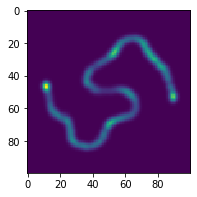

1100 -0.8379410650012026
1200 -0.8232512881845904
1300 -0.7832097191993292
1400 -0.786107783918761
1500 -0.7487237681826135
1600 -0.7060919267581525
1700 -0.7387458317575415
1800 -0.6886826263183814
1900 -0.7032015570771059
2000 -0.6792703149956999


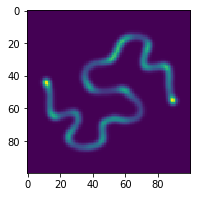

2100 -0.6704963707594086
2200 -0.6786377078225714
2300 -0.6459863557072407
2400 -0.6553303742915836
2500 -0.6486875692186099
2600 -0.6095960465692152
2700 -0.6488471656452894
2800 -0.6369420583842762
2900 -0.6004739257067228
3000 -0.5963884642409363


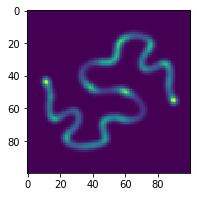

3100 -0.613700731366477
3200 -0.6176263203798424
3300 -0.6129546827514498
3400 -0.6089241922750345
3500 -0.5952891388710874
3600 -0.5891467365763468
3700 -0.588971399664751
3800 -0.5760639992425869
3900 -0.577083615042155
4000 -0.573634330130763


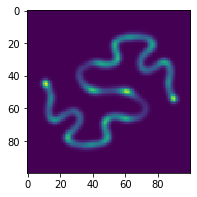

4100 -0.5667933874813351
4200 -0.566621741284213
4300 -0.5603703459472507
4400 -0.5441282815803076
4500 -0.5533840686474178
4600 -0.5768243201570022
4700 -0.5666877563599118
4800 -0.5635013657317142
4900 -0.545788025043425
5000 -0.5347567493828552


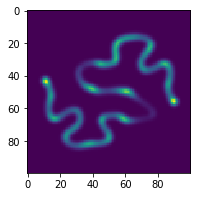

5100 -0.5591509239671411
5200 -0.5479342389230317
5300 -0.5614434338363888
5400 -0.5345661222495803
5500 -0.5349820172262751
5600 -0.552662665618681
5700 -0.5386351821732023
5800 -0.5313064659960891
5900 -0.5497268011129804
6000 -0.5158070764207412


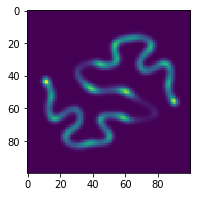

6100 -0.5449330845793969
6200 -0.5281842721820186
6300 -0.509086085279307
6400 -0.5537637151474372
6500 -0.5302706781011919
6600 -0.5235590128083052
6700 -0.5395591871172842
6800 -0.5258953351830197
6900 -0.5351179625756568
7000 -0.5552895068319585


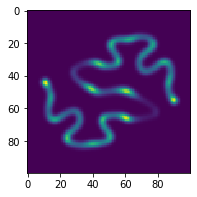

7100 -0.5394168832494848
7200 -0.5230869960642192
7300 -0.555167576323941
7400 -0.5263370909047205
7500 -0.5367730527465148
7600 -0.535667307447238
7700 -0.5191443594461488
7800 -0.5192614747054927
7900 -0.5362614682850262
8000 -0.5150746967450451


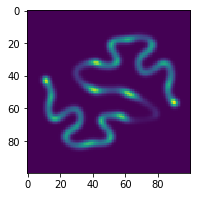

8100 -0.543153406520555
8200 -0.5100210317854157
8300 -0.5255529830150469
8400 -0.5411912725298418
8500 -0.533173346502867
8600 -0.5245571388045862
8700 -0.5256368661257058
8800 -0.547065280553382
8900 -0.5317904875515724
9000 -0.5503360286102223


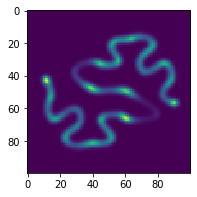

9100 -0.5691068174052689
9200 -0.5364904859253092
9300 -0.5625837167212822
9400 -0.547710895330327
9500 -0.5277329533581473
9600 -0.5247819772752271
9700 -0.5555742275688487
9800 -0.5569215495285675
9900 -0.5332094275874738
10000 -0.5431945037476965


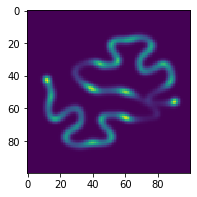

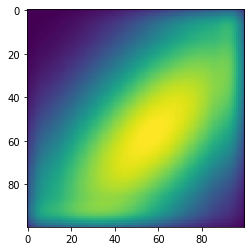

0 -25.623941690497613


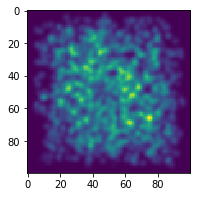

100 -7.7463871169543355
200 -4.392008583258127
300 -3.1023004438272404
400 -2.5566193887581905
500 -2.2775231221083043
600 -2.046808849552244
700 -1.8647574067222217
800 -1.7554947197377968
900 -1.6784478344010827
1000 -1.5217750863554045


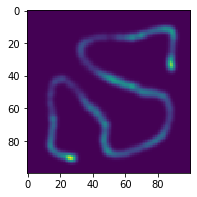

1100 -1.490504909415205
1200 -1.3835194342731354
1300 -1.3506693034602966
1400 -1.2900549488569475
1500 -1.3196908796968874
1600 -1.2395685424159306
1700 -1.258086093280455
1800 -1.1966651897424423
1900 -1.153459852951444
2000 -1.1888181110845624


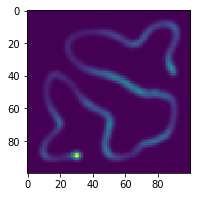

2100 -1.1440036835086547
2200 -1.1036432160638032
2300 -1.1368135224219962
2400 -1.099549696399678
2500 -1.0690385179259498
2600 -1.0802164371947567
2700 -1.0947290124447167
2800 -1.0763192940039152
2900 -1.0360912933632305
3000 -1.020294111864483


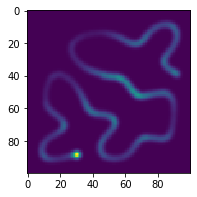

3100 -1.021809934750966
3200 -1.052258253471757
3300 -1.028110643530741
3400 -1.0319726994289233
3500 -0.9912917471158549
3600 -1.0138916052348041
3700 -1.0088492079883462
3800 -0.9955738638473037
3900 -0.973497802124647
4000 -0.9943706432216051


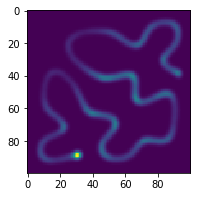

4100 -0.9967957370114967
4200 -0.9831801159346057
4300 -0.9563249986262795
4400 -0.9760191021789941
4500 -0.9766321406555041
4600 -0.9557004954010493
4700 -0.9621086613187826
4800 -0.939754247642939
4900 -0.9575026348199068
5000 -0.961739032025125


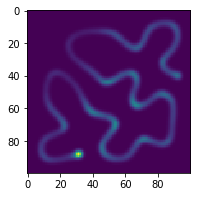

5100 -0.9492873103646968
5200 -0.9559759104663479
5300 -0.9340306035304293
5400 -0.95289039601126
5500 -0.945572691954344
5600 -0.907912590127181
5700 -0.9502263735064724
5800 -0.9369158898763551
5900 -0.9030157660473798
6000 -0.9327531775343192


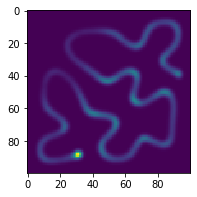

6100 -0.8913987242246595
6200 -0.9278039357340657
6300 -0.9019256379312635
6400 -0.927677700971743
6500 -0.8952054520018151
6600 -0.9228911461719829
6700 -0.9218113530578635
6800 -0.8833727594405983
6900 -0.9173493158585375
7000 -0.8951892289518647


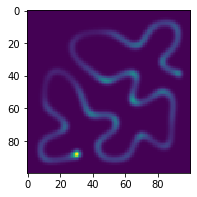

7100 -0.9169067876460135
7200 -0.9359676407662012
7300 -0.9104893669931642
7400 -0.8825573479109681
7500 -0.9089285874285149
7600 -0.8898284213624993
7700 -0.9043977999494989
7800 -0.9151064188160901
7900 -0.9112318263755619
8000 -0.8704592800165859


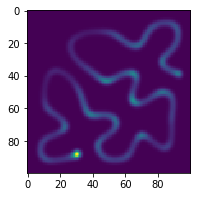

8100 -0.9026026143096826
8200 -0.9140504972860933
8300 -0.8726246802520756
8400 -0.8963092377087143
8500 -0.8914013743947083
8600 -0.857642512512647
8700 -0.8955981808950274
8800 -0.8837349827011588
8900 -0.8920975743104499
9000 -0.8595781113185379


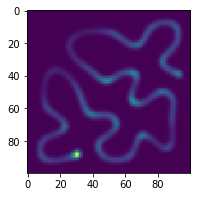

9100 -0.8919360940867473
9200 -0.8845826713387515
9300 -0.9028869548261022
9400 -0.8897567707259005
9500 -0.8534113906386018
9600 -0.8860496599388771
9700 -0.8700246193082884
9800 -0.8549650442947565
9900 -0.8857684424170336
10000 -0.8795348394787534


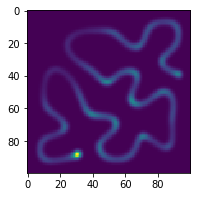

In [253]:
est_pdf_save = []

for k in range(0, 3):
    
    pdf = pdf_list[k]

    torch.cuda.set_device(6)

    size = 100
    resized_image = skimage.transform.resize(pdf[5:-5,5:-5], (size, size), order=3, mode='constant', anti_aliasing=True)
    
    if k == 2:
            resized_image = skimage.transform.resize(pdf[20:-20,20:-20], (size, size), order=3, mode='constant', anti_aliasing=True)

    res_pdf = resized_image/resized_image.sum()
    res_pdf = torch.from_numpy(res_pdf)
    plt.imshow(res_pdf)
    plt.show()

    encoder = net(input_dim = size**2, HIDDEN = 2000, out_dim = 1).cuda()
    decoder = net(input_dim = 2000, HIDDEN = 2000, out_dim = 2).cuda()

    error_list = []
    error_list_2 = []

    optimizer = optim.Adam([
          {'params': encoder.parameters(), 'lr': 0.0001, 'betas': (0.0, 0.0)},
          {'params': decoder.parameters(), 'lr': 0.0001, 'betas': (0.0, 0.0)},
       ])

    xx = np.linspace(-1.05, 1.05, size)
    yy = np.linspace(-1.05, 1.05, size)
    XX, YY = np.meshgrid(xx, yy)

    grid_points = torch.from_numpy(np.column_stack([XX.ravel(), YY.ravel()]))

    for i in range(0, 10001):

        center_y = encoder(torch.eye(size**2).cuda())
        continuous_y = torch.from_numpy(np.linspace(-1.1, 1.1, 2000)).unsqueeze(1).cuda()
        p_y_given_x = torch.exp(-((continuous_y.unsqueeze(1) - center_y.unsqueeze(0))**2).mean(-1)/0.001)

        center_x = decoder(torch.eye(2000).cuda())
        p_x_given_y = torch.exp(-((grid_points.unsqueeze(1).cuda() - center_x.unsqueeze(0))**2).mean(-1)/0.001)

        error = -((grid_points.unsqueeze(1).cuda() - center_x.unsqueeze(0))**2).mean(-1)

        pxy = p_y_given_x*res_pdf.reshape(1, -1).cuda()

        loss = (pxy*(error.T)).sum()
        (-loss).backward()

        optimizer.step()
        optimizer.zero_grad()

        if i % 100 == 0:
            print(i, loss.item())

            if i%1000 == 0:
                plt.figure(figsize=(3, 3))
                plt.imshow((pxy.T@p_x_given_y.T).detach().cpu().sum(0).reshape(size, size))
                plt.show()

    est_pdf_save.append((pxy.T@p_x_given_y.T).detach().cpu().sum(0).reshape(size, size))

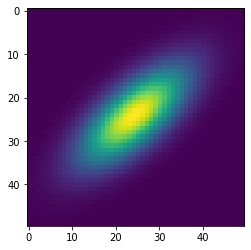

0 -17.992633957069422


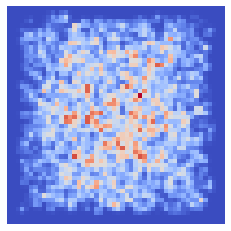

100 -14.363623402731095
200 -10.88953780528986
300 -10.49986431261712
400 -7.841736094677937
500 -2.8891638384319647
600 -1.8126311870190444
700 -1.6679791147885
800 -1.4981652347799503
900 -1.3714524450326846
1000 -1.325317088185531


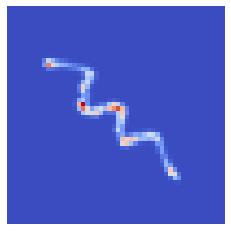

1100 -1.113183620670269
1200 -1.092312070151345
1300 -0.9914598758062327
1400 -1.0274736817668721
1500 -0.9899561503680985
1600 -0.9554765022509708
1700 -0.9333843239750044
1800 -0.9218101504542224
1900 -0.8860485451756578
2000 -0.8625486762617235


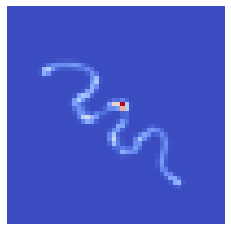

2100 -0.8594704418078947
2200 -0.7976124168999925
2300 -0.8094190419837348
2400 -0.8274243150844971
2500 -0.7947114688573433
2600 -0.7872092718250653
2700 -0.7457524119868253
2800 -0.6812247988138335
2900 -0.6646457902582295
3000 -0.6037710559403173


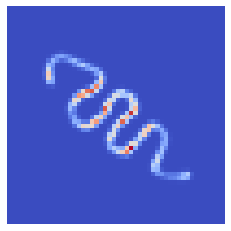

3100 -0.6524238800074689
3200 -0.5709235961769523
3300 -0.5815298615345401
3400 -0.5509164323886602
3500 -0.5212350386673538
3600 -0.49921864671298055
3700 -0.48523316661728927
3800 -0.4696096322472483
3900 -0.43951824428967345
4000 -0.4375469305118088


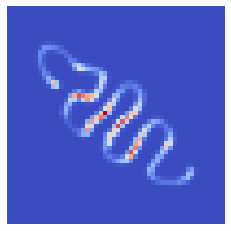

4100 -0.40562000382776925
4200 -0.40880364644512357
4300 -0.40552447177899664
4400 -0.4014441628068662
4500 -0.3821809466951711
4600 -0.39826778993183415
4700 -0.3740112552691538
4800 -0.3657417880790421
4900 -0.36701744898668803
5000 -0.35904367159753686


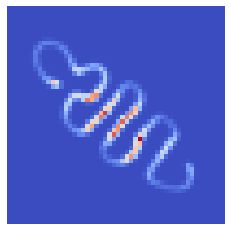

5100 -0.3665546927623918
5200 -0.3572685982081143
5300 -0.3467399505323456
5400 -0.3431392501642979
5500 -0.34097772751277566
5600 -0.3387248763545653
5700 -0.3462654830982761
5800 -0.3414408021626013
5900 -0.3382658055193032
6000 -0.3283549609033498


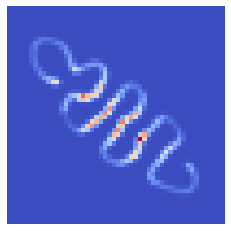

6100 -0.3441556182721034
6200 -0.3338331179712675
6300 -0.326474505391783
6400 -0.334475084495928
6500 -0.3367430251881023
6600 -0.3356004716938943
6700 -0.3291481399330314
6800 -0.328248299294475
6900 -0.3237473672933271
7000 -0.3063448920970493


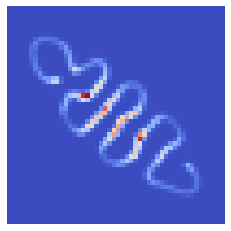

7100 -0.3344557463212021
7200 -0.316538703821225
7300 -0.3162500363565216
7400 -0.3064187431683708
7500 -0.30323427322666435
7600 -0.29920016191453663
7700 -0.32533338825658975
7800 -0.30363777456300556
7900 -0.3189813208237615
8000 -0.30300143930816525


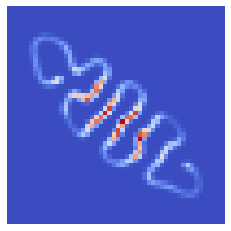

8100 -0.2982206112777127
8200 -0.2915074550602782
8300 -0.2994810962597079
8400 -0.290664770857282
8500 -0.2810949053877142
8600 -0.28682508373724425
8700 -0.2872997054050909
8800 -0.2875161945302215
8900 -0.294749794476556
9000 -0.30240708268521044


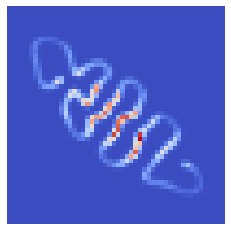

9100 -0.2812323494511574
9200 -0.2809962647918014
9300 -0.3001794537106723
9400 -0.2788364072598749
9500 -0.27369820026969005
9600 -0.2908867470709722
9700 -0.27775667987367597
9800 -0.2950429375627027
9900 -0.27982927213559605
10000 -0.28672138918522755


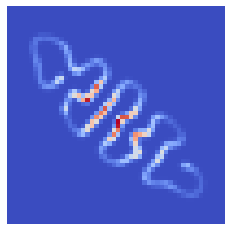

In [187]:
k  = 2

pdf = pdf_list[k]

torch.cuda.set_device(7)

size = 50
resized_image = skimage.transform.resize(pdf[10:-10,10:-10], (size, size), order=3, mode='constant', anti_aliasing=True)

res_pdf = resized_image/resized_image.sum()
res_pdf = torch.from_numpy(res_pdf)
plt.imshow(res_pdf)
plt.show()

encoder = net(input_dim = size**2, HIDDEN = 3000, out_dim = 1).cuda()
decoder = net(input_dim = 3000, HIDDEN = 3000, out_dim = 2).cuda()

error_list = []
error_list_2 = []

optimizer = optim.Adam([
      {'params': encoder.parameters(), 'lr': 0.0001, 'betas': (0.0, 0.0)},
      {'params': decoder.parameters(), 'lr': 0.0001, 'betas': (0.0, 0.0)},
   ])

xx = np.linspace(-1.05, 1.05, size)
yy = np.linspace(-1.05, 1.05, size)
XX, YY = np.meshgrid(xx, yy)

grid_points = torch.from_numpy(np.column_stack([XX.ravel(), YY.ravel()]))

for i in range(0, 10001):

    center_y = encoder(torch.eye(size**2).cuda())
    continuous_y = torch.from_numpy(np.linspace(-1.1, 1.1, 3000)).unsqueeze(1).cuda()
    p_y_given_x = torch.exp(-((continuous_y.unsqueeze(1) - center_y.unsqueeze(0))**2).mean(-1)/0.0005)

    center_x = decoder(torch.eye(3000).cuda())
    p_x_given_y = torch.exp(-((grid_points.unsqueeze(1).cuda() - center_x.unsqueeze(0))**2).mean(-1)/0.0005)

    error = -((grid_points.unsqueeze(1).cuda() - center_x.unsqueeze(0))**2).mean(-1)

    pxy = p_y_given_x*res_pdf.reshape(1, -1).cuda()

    loss = (pxy*(error.T)).sum()
    (-loss).backward()

    optimizer.step()
    optimizer.zero_grad()

    if i % 100 == 0:
        print(i, loss.item())

        if i%1000 == 0:
            estimated = (pxy.T@p_x_given_y.T).detach().cpu().sum(0).reshape(size, size).numpy()[::-1]

            plt.imshow(estimated, cmap='coolwarm')
            plt.axis('off')
            plt.savefig('est_pdf_1.pdf',bbox_inches='tight', dpi=300)
            plt.show()
        
# est_pdf_save.append((pxy.T@p_x_given_y.T).detach().cpu().sum(0).reshape(size, size))

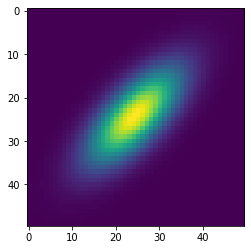

0 -16.650351926222314


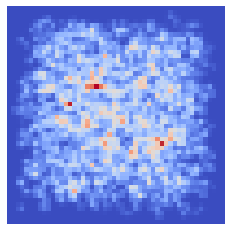

KeyboardInterrupt: 

In [10]:
k  = 2

pdf = pdf_list[k]

torch.cuda.set_device(7)

size = 50
resized_image = skimage.transform.resize(pdf[10:-10,10:-10], (size, size), order=3, mode='constant', anti_aliasing=True)

res_pdf = resized_image/resized_image.sum()
res_pdf = torch.from_numpy(res_pdf)
plt.imshow(res_pdf)
plt.show()

encoder = net(input_dim = size**2, HIDDEN = 3000, out_dim = 1).cuda()
decoder = net(input_dim = 3000, HIDDEN = 3000, out_dim = 2).cuda()

error_list = []
error_list_2 = []

optimizer = optim.Adam([
      {'params': encoder.parameters(), 'lr': 0.0001, 'betas': (0.0, 0.0)},
      {'params': decoder.parameters(), 'lr': 0.0001, 'betas': (0.0, 0.0)},
   ])

xx = np.linspace(-1.05, 1.05, size)
yy = np.linspace(-1.05, 1.05, size)
XX, YY = np.meshgrid(xx, yy)

grid_points = torch.from_numpy(np.column_stack([XX.ravel(), YY.ravel()]))

for i in range(0, 10001):

    center_y = encoder(torch.eye(size**2).cuda())
    continuous_y = torch.from_numpy(np.linspace(-1.1, 1.1, 3000)).unsqueeze(1).cuda()
    p_y_given_x = torch.exp(-((continuous_y.unsqueeze(1) - center_y.unsqueeze(0))**2).mean(-1)/0.0005)

    center_x = decoder(torch.eye(3000).cuda())
    p_x_given_y = torch.exp(-((grid_points.unsqueeze(1).cuda() - center_x.unsqueeze(0))**2).mean(-1)/0.0005)

    error = -((grid_points.unsqueeze(1).cuda() - center_x.unsqueeze(0))**2).mean(-1)

    pxy = p_y_given_x*res_pdf.reshape(1, -1).cuda()

    loss = (pxy*(error.T)).sum()
    (-loss).backward()

    optimizer.step()
    optimizer.zero_grad()

    if i % 100 == 0:
        print(i, loss.item())

        if i%1000 == 0:
            estimated = (pxy.T@p_x_given_y.T).detach().cpu().sum(0).reshape(size, size).numpy()[::-1]

            plt.imshow(estimated, cmap='coolwarm')
            plt.axis('off')
            plt.savefig('est_pdf_1.pdf',bbox_inches='tight', dpi=300)
            plt.show()
        
# est_pdf_save.append((pxy.T@p_x_given_y.T).detach().cpu().sum(0).reshape(size, size))

In [11]:
center_y.shape

torch.Size([2500, 1])

In [12]:
p_y_given_x.shape

torch.Size([3000, 2500])

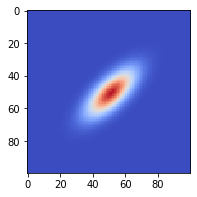

In [239]:
def generate_gaussian_data(n_samples=100000, mean=[0, 0], std_dev=[1, 1], rho=0):
    # Calculate the covariance using rho
    covariance = rho * std_dev[0] * std_dev[1]
    cov_matrix = [[std_dev[0]**2, covariance], [covariance, std_dev[1]**2]]
    
    # Sample from the multivariate Gaussian
    data = np.random.multivariate_normal(mean, cov_matrix, n_samples)
    data = data-data.min()
    data = data/data.max()

    return data

data = generate_gaussian_data(10000000, rho=-0.7)
data = data-data.mean(0)
data = data/data.max(0)
X_train = data

# X_train = X_train-X_train.mean(0)
# X_train = X_train/X_train.max()

X_train = X_train-X_train.min()
X_train = X_train/X_train.max()


# Define the range for both axes
axis_range = [(0, 1), (0, 1)]

# Define the number of bins
bins = 100

# Calculate the 2D histogram and return the matrix of histogram values
hist, xedges, yedges = np.histogram2d(X_train[:, 0], X_train[:, 1], bins=bins, range=axis_range, density=True)

# Normalize the histogram to make it a PDF
pdf = hist / np.sum(hist)
pdf = torch.from_numpy(pdf)
gauss_pdf_2 = pdf

plt.figure(figsize=(3, 3))
plt.imshow(gauss_pdf_2, cmap='coolwarm')
plt.show()

In [275]:
class net(nn.Module):
    def __init__(self, input_dim = 784, HIDDEN = 2000, out_dim = 200):
        super(net, self).__init__()
        self.dim = out_dim
    
        self.fc1 = nn.Linear(input_dim+5, HIDDEN, bias=True)
        self.bn1 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn2 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc3 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn3 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc4 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn4 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc5 = nn.Linear(HIDDEN, out_dim, bias=True)

        self.fc6 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn6 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc7 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn7 = torch.nn.BatchNorm1d(HIDDEN)

    def forward(self, x):
        
        x = torch.cat((x, torch.zeros((x.shape[0], 5)).uniform_().cuda()), 1)
        x = self.bn1(torch.relu((self.fc1(x))))
        x = self.bn2(torch.relu((self.fc2(x))))
        x = self.bn3(torch.relu((self.fc3(x))))
        x = self.bn4(torch.relu((self.fc4(x))))
        x = self.bn6(torch.relu((self.fc6(x))))
        x = self.bn7(torch.relu((self.fc7(x))))

        x = torch.tanh(self.fc5(x))

        return x



0 -43.52761272142101


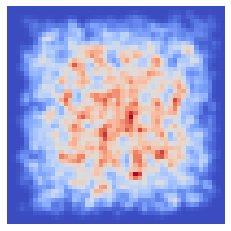

100 -18.869463301169077
200 -6.363383957242492
300 -3.784340659197555
400 -2.21295811731387
500 -1.843707695512244


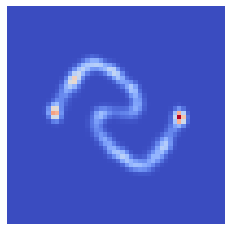

600 -1.6246311868605519
700 -1.5151567525364094
800 -1.3968499381358401
900 -1.2007706168504528
1000 -1.1762481230817436


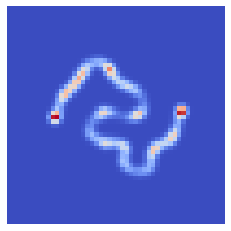

1100 -1.1682995053150882
1200 -1.178770164591365
1300 -1.1314501500182153
1400 -1.2119193441501488
1500 -1.0881834568079718


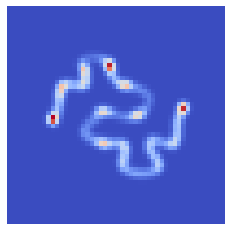

1600 -1.1618826725982314
1700 -0.9266190883739515
1800 -0.9821050473600839
1900 -0.9436821270578171
2000 -0.9219446347043482


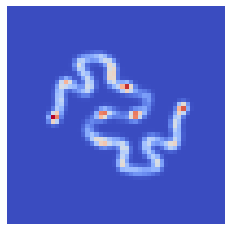

2100 -0.9085799253335749
2200 -0.8557657181973574
2300 -0.9012480949440567
2400 -0.9932923182227712
2500 -0.941080885292608


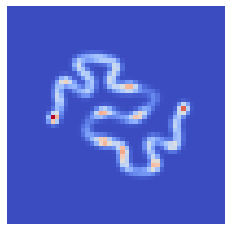

2600 -0.873801507287493
2700 -0.9526616922547271
2800 -1.0436533465006723
2900 -1.0320192770715069
3000 -0.8127878737261593


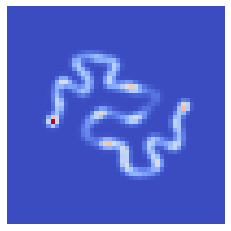

3100 -0.8570401951255873
3200 -0.9468703819983619
3300 -0.8596917491411205
3400 -0.8808159402111378
3500 -0.8748405597534283


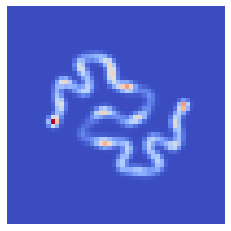

3600 -0.8640012398521069
3700 -0.9735300913937472
3800 -0.9217190144650055
3900 -0.893436859020498
4000 -0.8323376897776439


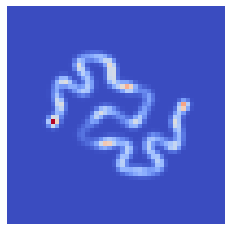

4100 -0.9132639413474025
4200 -0.8478218022125866
4300 -0.8444502197248847
4400 -0.927509862785756
4500 -0.8082689428052587


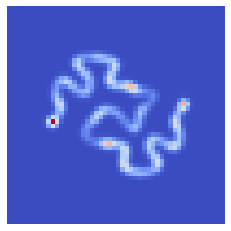

4600 -0.9787186649820833
4700 -0.9049575666026108
4800 -0.9941904052259245
4900 -0.9099795674676578
5000 -0.9752183464043171


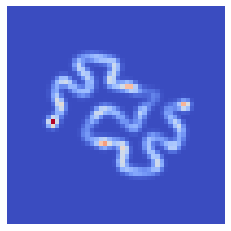

5100 -0.9458839256392877
5200 -0.9475624732800958
5300 -0.987072300280937
5400 -0.7961315977052958
5500 -0.8323824631106855


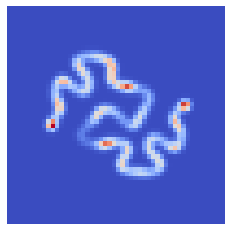

5600 -0.8015129618975645
5700 -0.8780107866100764
5800 -0.9194394129456622
5900 -0.8017111068169498
6000 -0.8317723979541239


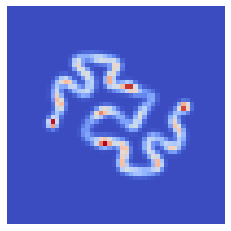

6100 -0.9065089949983199
6200 -0.810087213878651
6300 -0.8328774259566545
6400 -0.9381136774936967
6500 -0.8660765538171921


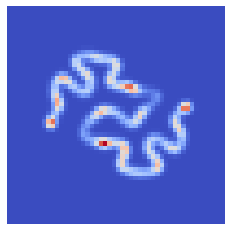

6600 -0.8631150332169182
6700 -0.7694616892488529
6800 -0.8967554562640051
6900 -0.7372660130526186
7000 -0.7455086971757172


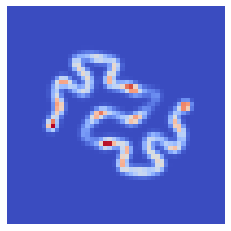

7100 -0.812682525224807
7200 -0.7660496132562156
7300 -0.8711079893812832
7400 -0.87449380386989


KeyboardInterrupt: 

In [281]:
k  = 1
pdf = pdf_list[k]

size = 50
resized_image = skimage.transform.resize(pdf[:,:], (size, size), order=3, mode='constant', anti_aliasing=True)
res_pdf = resized_image/resized_image.sum()
res_pdf = torch.from_numpy(res_pdf)

encoder = net(input_dim = size**2, HIDDEN = 2000, out_dim = 1).cuda()
decoder = net(input_dim = 5000, HIDDEN = 2000, out_dim = 2).cuda()

error_list = []
error_list_2 = []

optimizer = optim.Adam([
      {'params': encoder.parameters(), 'lr': 0.0001, 'betas': (0.0, 0.0)},
      {'params': decoder.parameters(), 'lr': 0.0001, 'betas': (0.0, 0.0)},
   ])

xx = np.linspace(-1.05, 1.05, size)
yy = np.linspace(-1.05, 1.05, size)
XX, YY = np.meshgrid(xx, yy)

grid_points = torch.from_numpy(np.column_stack([XX.ravel(), YY.ravel()]))

for i in range(0, 100001):

    center_y = encoder(torch.eye(size**2).cuda())
    continuous_y = torch.from_numpy(np.linspace(-1.1, 1.1, 5000)).unsqueeze(1).cuda()
    p_y_given_x = torch.exp(-((continuous_y.unsqueeze(1) - center_y.unsqueeze(0))**2).mean(-1)/0.001)

    center_x = decoder(torch.eye(5000).cuda())
    p_x_given_y = torch.exp(-((grid_points.unsqueeze(1).cuda() - center_x.unsqueeze(0))**2).mean(-1)/0.001)
    
    error = -((grid_points.unsqueeze(1).cuda() - center_x.unsqueeze(0))**2).mean(-1)

    pxy = p_y_given_x*res_pdf.reshape(1, -1).cuda()
    
    loss = (pxy*(error.T)).sum()
    (-loss).backward()
    
    optimizer.step()
    optimizer.zero_grad()
        
    if i % 100 == 0:
        print(i, loss.item())
        
        if i%500 == 0:
#             plt.imshow((pxy.T@p_x_given_y.T).detach().cpu().sum(0).reshape(size, size))
#             plt.show()
            
            estimated = (pxy.T@p_x_given_y.T).detach().cpu().sum(0).reshape(size, size).numpy()[::-1]
            plt.imshow(estimated, cmap='coolwarm')
            plt.axis('off')
            plt.savefig('est_pdf_1.pdf',bbox_inches='tight', dpi=300)
            plt.show()
        


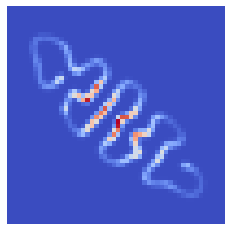

In [189]:
estimated = (pxy.T@p_x_given_y.T).detach().cpu().sum(0).reshape(size, size).numpy()[::-1]

plt.imshow(estimated, cmap='coolwarm')
plt.axis('off')
plt.savefig('est_pdf_3.pdf',bbox_inches='tight', dpi=300)
plt.show()

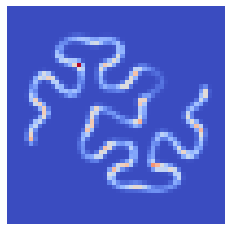

In [153]:
estimated = (pxy.T@p_x_given_y.T).detach().cpu().sum(0).reshape(size, size).numpy()[::-1]

plt.imshow(estimated, cmap='coolwarm')
plt.axis('off')
plt.savefig('est_pdf_3.pdf',bbox_inches='tight', dpi=300)
plt.show()

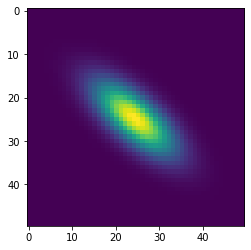

In [186]:
pdf = pdf_list[2]

torch.cuda.set_device(6)

size = 50
resized_image = skimage.transform.resize(pdf[5:-5,5:-5].numpy()[::-1], (size, size), order=3, mode='constant', anti_aliasing=True)
res_pdf = resized_image/resized_image.sum()
res_pdf = torch.from_numpy(res_pdf)
plt.imshow(res_pdf)
plt.show() 

In [171]:
!nvidia-smi

Thu Apr 17 10:41:01 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A6000                Off| 00000000:01:00.0 Off |                  Off |
| 30%   25C    P8               23W / 300W|  48670MiB / 49140MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

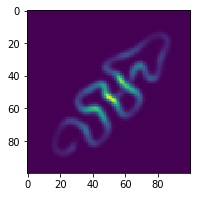

In [256]:
plt.figure(figsize=(3, 3))
plt.imshow((pxy.T@p_x_given_y.T).detach().cpu().sum(0).reshape(size, size))
plt.show()

In [271]:
# np.save('est_pdf.npy', torch.stack(est_pdf_save).numpy())
# np.save('save_centers.npy', np.stack(save_centers))

In [269]:
torch.stack(est_pdf_save).numpy().shape

(4, 100, 100)

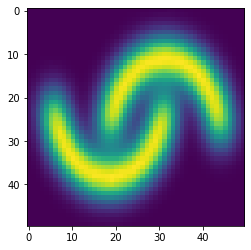

In [230]:
pdf = pdf_list[1]

torch.cuda.set_device(6)

size = 50
resized_image = skimage.transform.resize(pdf[5:-5,5:-5], (size, size), order=3, mode='constant', anti_aliasing=True)
res_pdf = resized_image/resized_image.sum()
res_pdf = torch.from_numpy(res_pdf)
plt.imshow(res_pdf)
plt.show()

In [231]:
class net(nn.Module):
    def __init__(self, input_dim = 784, HIDDEN = 2000, out_dim = 200):
        super(net, self).__init__()
        self.dim = out_dim
    
        self.fc1 = nn.Linear(input_dim+5, HIDDEN, bias=True)
        self.bn1 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn2 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc3 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn3 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc4 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn4 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc5 = nn.Linear(HIDDEN, out_dim, bias=True)

        self.fc6 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn6 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc7 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn7 = torch.nn.BatchNorm1d(HIDDEN)

    def forward(self, x):
        
        x = torch.cat((x, torch.zeros((x.shape[0], 5)).uniform_().cuda()), 1)
        x = self.bn1(torch.relu((self.fc1(x))))
        x = self.bn2(torch.relu((self.fc2(x))))
        x = self.bn3(torch.relu((self.fc3(x))))
        x = self.bn4(torch.relu((self.fc4(x))))
        x = self.bn6(torch.relu((self.fc6(x))))

        x = torch.tanh(self.fc5(x))

        return x

In [232]:
# for k in range(0, 3):
    
#     pdf = pdf_list[k]

#     torch.cuda.set_device(6)

#     def gauss(A,B,var):
#         return torch.exp(-((A.unsqueeze(1) - B.unsqueeze(0))**2).mean(2)/(2*var))

#     torch.manual_seed(0)
#     np.random.seed(0)

#     E = encoder(input_dim = 2, out_dim = 1).cuda()
#     D = decoder(input_dim = 1, out_dim = 2).cuda()

#     optimizer_E = optim.Adam([
#           {'params': E.parameters(), 'lr': 0.0001, 'betas': (0.5, 0.9)},
#        ])

#     optimizer_D = optim.Adam([
#           {'params': D.parameters(), 'lr': 0.0001, 'betas': (0.5, 0.9)},
#        ])

#     error_curve = []

#     for i in range(0, 50001):

#         b1 = np.random.choice(train_data.shape[0], 1000)
#         batch_data = torch.from_numpy(train_data[b1]).float().cuda()

#         encoded = E(batch_data)
#         decoded = D(encoded)

#         error = ((decoded - batch_data)**2).mean(-1).mean(0)
#         error.backward()
#         error_curve.append(error.item())

#         optimizer_E.step()
#         optimizer_D.step()

#         optimizer_E.zero_grad()
#         optimizer_D.zero_grad()

#         if i % 1000 == 0:
#             print(i, error.item())

#             if i%5000 == 0:
#                 E.eval()
#                 D.eval()

#                 decoded = decoded.detach().cpu()
#                 plt.figure(figsize=(3, 3))
#                 plt.scatter(decoded[:, 0], decoded[:, 1], s=1)
#                 plt.show()

#                 E.train()
#                 D.train()

In [207]:
class encoder(nn.Module):
    def __init__(self, input_dim = 784, HIDDEN = 200, out_dim = 200):
        super(encoder, self).__init__()
        self.dim = out_dim
    
        self.fc1 = nn.Linear(input_dim+20, HIDDEN, bias=True)
        self.bn1 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn2 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc3 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn3 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc4 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn4 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc6 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn6 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc7 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn7 = torch.nn.BatchNorm1d(HIDDEN)

        self.fc5 = nn.Linear(HIDDEN, out_dim, bias=True)

    def forward(self, x):
        
        x = torch.cat((x, torch.zeros((x.shape[0], 20)).uniform_().cuda()), 1)
        x = self.bn1(torch.relu((self.fc1(x))))
        x = self.bn2(torch.relu((self.fc2(x))))
#         x = self.bn3(torch.relu((self.fc3(x))))
#         x = self.bn4(torch.relu((self.fc4(x))))
#         x = self.bn6(torch.relu((self.fc6(x))))

        x = torch.sigmoid(self.fc5(x))

        return x

class decoder(nn.Module):
    def __init__(self, input_dim = 20, HIDDEN = 200, out_dim = 784):
        super(decoder, self).__init__()
        self.dim = out_dim
    
        self.fc1 = nn.Linear(input_dim+5, HIDDEN, bias=True)
        self.bn1 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn2 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc3 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn3 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc4 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn4 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc6 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn6 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc7 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn7 = torch.nn.BatchNorm1d(HIDDEN)

        self.fc5 = nn.Linear(HIDDEN, out_dim, bias=True)

    def forward(self, x):
        
        x = torch.cat((x, torch.zeros((x.shape[0], 5)).uniform_().cuda()), 1)
        x = self.bn1(torch.relu((self.fc1(x))))
        x = self.bn2(torch.relu((self.fc2(x))))
#         x = self.bn3(torch.relu((self.fc3(x))))
#         x = self.bn4(torch.relu((self.fc4(x))))
#         x = self.bn6(torch.relu((self.fc6(x))))

        x = torch.sigmoid(self.fc5(x))

        return x

0 0.026240933686494827


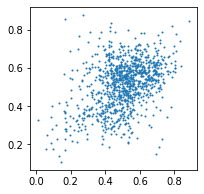

1000 0.0014470696914941072
2000 0.0013233920326456428
3000 0.0013131404994055629
4000 0.0012800053227692842
5000 0.0012978704180568457


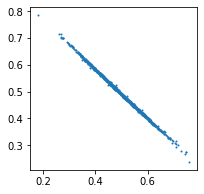

6000 0.0012766877189278603
7000 0.0013297797413542867
8000 0.0012857898836955428
9000 0.0014042669208720326
10000 0.001213722163811326


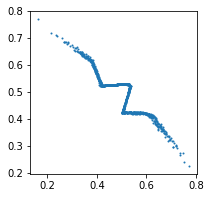

11000 0.0011280326871201396
12000 0.0011052823392674327
13000 0.0008185902261175215
14000 0.0008854455663822591
15000 0.0009675740730017424


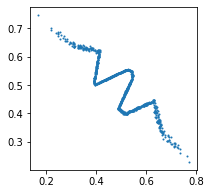

16000 0.0009207307593896985
17000 0.0008776509785093367
18000 0.0008850705926306546
19000 0.0008710100082680583
20000 0.0008618543506599963


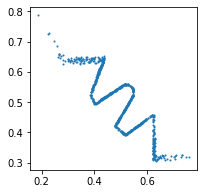

21000 0.0008214340195991099
22000 0.0007817895384505391
23000 0.000756221532355994
24000 0.0007397441077046096
25000 0.0007978673675097525


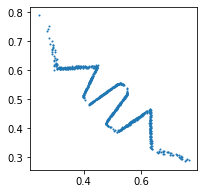

26000 0.0008506369777023792
27000 0.0007466231472790241
28000 0.0007878384785726666
29000 0.0007524517131969333
30000 0.0007146276766434312


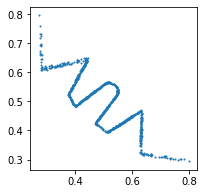

31000 0.0008751375135034323
32000 0.0007027687970548868
33000 0.0006850218633189797
34000 0.0007466889801435173
35000 0.0007625754224136472


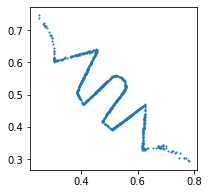

36000 0.0006502612959593534
37000 0.0008253618725575507
38000 0.0007038434850983322
39000 0.0006755247595719993
40000 0.0008546270546503365


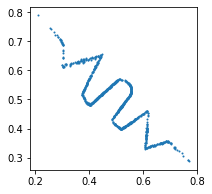

41000 0.0006626054528169334
42000 0.0008058928069658577
43000 0.0009099104790948331
44000 0.0006694135954603553
45000 0.0005455532809719443


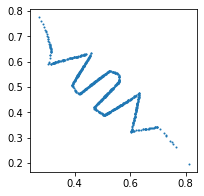

46000 0.0007180902175605297
47000 0.0006628439878113568
48000 0.0006672362214885652
49000 0.0007466890965588391
50000 0.0006540290778502822


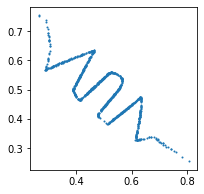

51000 0.0007176568615250289
52000 0.000682353915181011
53000 0.000704025907907635
54000 0.0006121162441559136
55000 0.00064279226353392


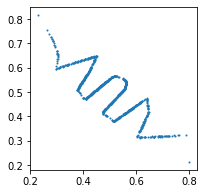

56000 0.0006086459616199136
57000 0.0006907928036525846
58000 0.0006391963106580079
59000 0.0006022949237376451
60000 0.0006476711132563651


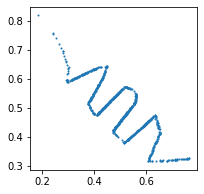

61000 0.0006241514929570258
62000 0.0007305566687136889
63000 0.000541943940334022
64000 0.0009811606723815203
65000 0.0006426080944947898


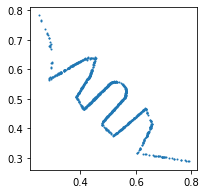

66000 0.0007632227498106658
67000 0.0006135358707979321
68000 0.0005493939388543367
69000 0.0006604614900425076
70000 0.0005895508802495897


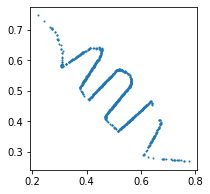

71000 0.0006777587113901973
72000 0.0007518760394304991
73000 0.0007481934153474867
74000 0.0006562861963175237
75000 0.00064851128263399


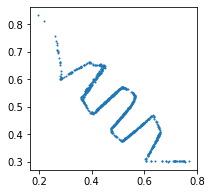

76000 0.0006068178918212652
77000 0.000673803617246449
78000 0.0005934382788836956
79000 0.0006781021947972476
80000 0.0006330771720968187


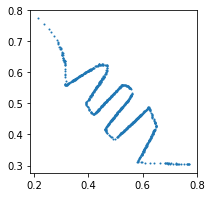

81000 0.0006079347222112119
82000 0.0005736325401812792
83000 0.0006495529087260365
84000 0.0006695340271107852
85000 0.0007154277991503477


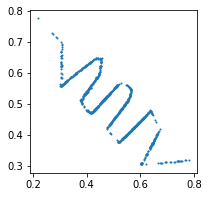

86000 0.0006103443447500467
87000 0.0005273760762065649
88000 0.00060238316655159
89000 0.0005898778326809406
90000 0.0005355920875445008


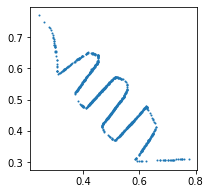

91000 0.0005721315974369645
92000 0.000579026818741113
93000 0.0006002943846397102
94000 0.0006401313585229218
95000 0.0005908096209168434


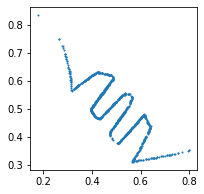

96000 0.000492589024361223
97000 0.0008222616743296385
98000 0.0007613277994096279


In [ ]:
save_centers = []

for k in [2]:
    train_data = run_dataset[k]

    torch.cuda.set_device(4)

    def gauss(A,B,var):
        return torch.exp(-((A.unsqueeze(1) - B.unsqueeze(0))**2).mean(2)/(2*var))

    torch.manual_seed(0)
    np.random.seed(0)

    E = encoder(input_dim = 2, out_dim = 1).cuda()
    D = decoder(input_dim = 1, out_dim = 2).cuda()

    optimizer_E = optim.Adam([
          {'params': E.parameters(), 'lr': 0.001, 'betas': (0.5, 0.9)},
       ])

    optimizer_D = optim.Adam([
          {'params': D.parameters(), 'lr': 0.001, 'betas': (0.5, 0.9)},
       ])

    error_curve = []

    for i in range(0, 100001):

        b1 = np.random.choice(train_data.shape[0], 1000)
        batch_data = torch.from_numpy(train_data[b1]).float().cuda()

        encoded = E(batch_data)
        decoded = D(encoded)

        error = ((decoded - batch_data)**2).mean(-1).mean(0)
        error.backward()
        error_curve.append(error.item())

        optimizer_E.step()
        optimizer_D.step()

        optimizer_E.zero_grad()
        optimizer_D.zero_grad()

        if i % 1000 == 0:
            print(i, error.item())

            if i%5000 == 0:
                E.eval()
                D.eval()

                decoded = decoded.detach().cpu()
                plt.figure(figsize=(3, 3))
                plt.scatter(decoded[:, 0], decoded[:, 1], s=1)
                plt.show()

                E.train()
                D.train()
    
    decoded = decoded.detach().cpu().numpy()
    save_centers.append(decoded)

In [283]:
class encoder(nn.Module):
    def __init__(self, input_dim = 784, HIDDEN = 2000, out_dim = 200):
        super(encoder, self).__init__()
        self.dim = out_dim
    
        self.fc1 = nn.Linear(input_dim+10, HIDDEN, bias=True)
        self.bn1 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn2 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc3 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn3 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc4 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn4 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc6 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn6 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc7 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn7 = torch.nn.BatchNorm1d(HIDDEN)

        self.fc5 = nn.Linear(HIDDEN, out_dim, bias=True)

    def forward(self, x):
        
        x = torch.cat((x, torch.zeros((x.shape[0], 10)).uniform_().cuda()), 1)
        x = self.bn1(torch.relu((self.fc1(x))))
        x = self.bn2(torch.relu((self.fc2(x))))
        x = self.bn3(torch.relu((self.fc3(x))))

        x = torch.sigmoid(self.fc5(x))

        return x

class decoder(nn.Module):
    def __init__(self, input_dim = 20, HIDDEN = 2000, out_dim = 784):
        super(decoder, self).__init__()
        self.dim = out_dim
    
        self.fc1 = nn.Linear(input_dim+10, HIDDEN, bias=True)
        self.bn1 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn2 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc3 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn3 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc4 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn4 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc6 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn6 = torch.nn.BatchNorm1d(HIDDEN)
        self.fc7 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.bn7 = torch.nn.BatchNorm1d(HIDDEN)

        self.fc5 = nn.Linear(HIDDEN, out_dim, bias=True)

    def forward(self, x):
        
        x = torch.cat((x, torch.zeros((x.shape[0], 10)).uniform_().cuda()), 1)
        x = self.bn1(torch.relu((self.fc1(x))))
        x = self.bn2(torch.relu((self.fc2(x))))
        x = self.bn3(torch.relu((self.fc3(x))))
#         x = self.bn4(torch.relu((self.fc4(x))))
#         x = self.bn6(torch.relu((self.fc6(x))))

        x = torch.sigmoid(self.fc5(x))

        return x

0 0.027102747932076454


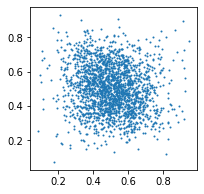

100 0.005122546572238207
200 0.0027029968332499266
300 0.002355684293434024
400 0.002182064112275839
500 0.0024421371053904295
600 0.002237607492133975
700 0.0021139588207006454
800 0.0020312939304858446
900 0.002141995821148157
1000 0.0018869912018999457
1100 0.0018055092077702284
1200 0.0019564535468816757
1300 0.0018644104711711407
1400 0.001826497376896441
1500 0.001659956993535161
1600 0.0016857022419571877
1700 0.0016474159201607108
1800 0.0016118560452014208
1900 0.0016008024103939533
2000 0.0016386230709031224


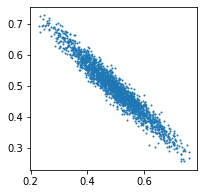

2100 0.001599727664142847
2200 0.0016197923105210066
2300 0.001549328793771565
2400 0.0015007572947070003
2500 0.0015204075025394559
2600 0.0016196828801184893
2700 0.001651656231842935
2800 0.0014835251495242119
2900 0.0015359775861725211
3000 0.0014670101227238774
3100 0.001443052664399147
3200 0.0014787147520110011
3300 0.0015008251648396254
3400 0.0014855187619104981
3500 0.0014855635818094015
3600 0.0015065277693793178
3700 0.001473075826652348
3800 0.0014630816876888275
3900 0.0015410929918289185
4000 0.0014497721567749977


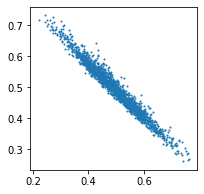

4100 0.0014103901339694858
4200 0.0014134567463770509
4300 0.001435865182429552
4400 0.0014097767416387796
4500 0.001427838928066194
4600 0.0014650675002485514
4700 0.0014126170426607132
4800 0.0014517083764076233
4900 0.001446608337573707
5000 0.0014295626897364855
5100 0.0013650048058480024
5200 0.0014580191345885396
5300 0.0013209552271291614
5400 0.0013256939128041267
5500 0.0013823654735460877
5600 0.001374242827296257
5700 0.0014447614084929228
5800 0.0013912098947912455
5900 0.0014175501419231296
6000 0.0014852694002911448


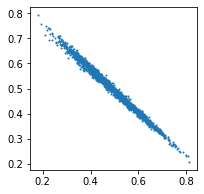

6100 0.0013752018567174673
6200 0.0012891647638753057
6300 0.001350930193439126
6400 0.0013911784626543522
6500 0.0013452480779960752
6600 0.0014629570068791509
6700 0.0013713522348552942
6800 0.0013877677265554667
6900 0.0013832062250003219
7000 0.0013781054876744747
7100 0.0014059493551030755
7200 0.0013730642385780811
7300 0.001362218172289431
7400 0.0013941751094534993
7500 0.0014054329367354512
7600 0.0014041579561308026
7700 0.0014088136376813054
7800 0.0013120861258357763
7900 0.00137476553209126
8000 0.0013876111479476094


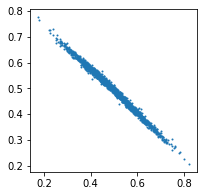

8100 0.0012941639870405197
8200 0.0012991459807381034
8300 0.001303567667491734
8400 0.001370201469399035
8500 0.0013607512228190899
8600 0.0013847057707607746
8700 0.0013427486410364509
8800 0.0014160117134451866
8900 0.001356397639028728
9000 0.001376403495669365
9100 0.0013382898177951574
9200 0.0013902285136282444
9300 0.0013685021549463272
9400 0.0014048053417354822
9500 0.0013422654010355473
9600 0.0013875624863430858
9700 0.001354781212285161
9800 0.0014385198010131717
9900 0.0013470049016177654
10000 0.0013929117703810334


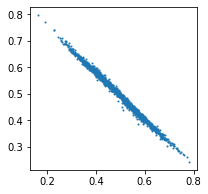

10100 0.0013495233142748475
10200 0.0014147571055218577
10300 0.0013644092250615358
10400 0.0013198783854022622
10500 0.0013300565769895911
10600 0.001257493975572288
10700 0.001254273229278624
10800 0.00137921457644552
10900 0.0012828906765207648
11000 0.001422873348928988
11100 0.0014976263046264648
11200 0.0013836591970175505
11300 0.0013576503843069077
11400 0.0013671321794390678
11500 0.0013076638570055366
11600 0.0014718995662406087
11700 0.001334997359663248
11800 0.0013309717178344727
11900 0.00140875403303653
12000 0.0012938730651512742


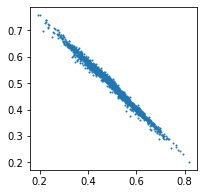

12100 0.001415267470292747
12200 0.0013765831245109439
12300 0.0013227307936176658
12400 0.0013819212326779962
12500 0.0013875997392460704
12600 0.0013086388353258371
12700 0.0013579563237726688
12800 0.0012609356781467795
12900 0.0012908113421872258
13000 0.0012202850775793195
13100 0.0011050945613533258
13200 0.0010637815576046705
13300 0.001116487430408597
13400 0.0011764896335080266
13500 0.0010729507775977254
13600 0.001057006185874343
13700 0.001130647026002407
13800 0.0010164618724957108
13900 0.0010594859486445785
14000 0.0010284066665917635


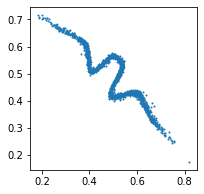

14100 0.001058134832419455
14200 0.0009781068656593561
14300 0.0009768512099981308
14400 0.0009847343899309635
14500 0.0009411616483703256
14600 0.001008306979201734
14700 0.0008933044737204909
14800 0.0009700011578388512
14900 0.0008920917753130198
15000 0.0009701274684630334
15100 0.0009849520865827799
15200 0.0009062592289410532
15300 0.0008793577435426414
15400 0.0009261496597900987
15500 0.0008755595190450549
15600 0.0008883954142220318
15700 0.0008519639959558845
15800 0.0009487937204539776
15900 0.0008159136050380766
16000 0.0008512441418133676


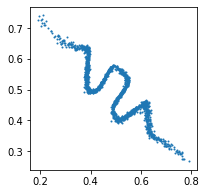

16100 0.0008993884548544884
16200 0.0008931383490562439
16300 0.0008941242704167962
16400 0.0009839193662628531
16500 0.0009052998502738774
16600 0.0008684213389642537
16700 0.0008455250062979758
16800 0.0008993718074634671
16900 0.0008866092539392412
17000 0.000904324755538255
17100 0.0008024684502743185
17200 0.0009016809635795653
17300 0.0008583525777794421
17400 0.0008276759181171656
17500 0.0008273136918433011
17600 0.0008290999685414135
17700 0.0008096687961369753
17800 0.0007730232900939882
17900 0.000787666707765311
18000 0.0007557789795100689


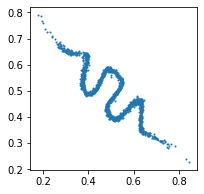

18100 0.0007314669201150537
18200 0.0008185590268112719
18300 0.0007303339662030339
18400 0.0008335555321536958
18500 0.0008491044864058495
18600 0.0008365085232071579
18700 0.0008042547269724309
18800 0.0007318520802073181
18900 0.0007494926685467362
19000 0.0007916276226751506
19100 0.0007456880994141102
19200 0.0008142355363816023
19300 0.0007643203134648502
19400 0.0008251657709479332
19500 0.0008028374286368489
19600 0.0007624594727531075
19700 0.0007300913566723466
19800 0.0007027590763755143
19900 0.0007237897370941937
20000 0.0007936564506962895


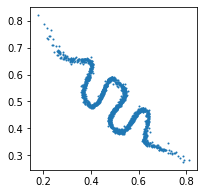

20100 0.0007866587839089334
20200 0.0006811590283177793
20300 0.0008173739770427346
20400 0.0007167033036239445
20500 0.0007526331464760005
20600 0.0007204136927612126
20700 0.0008327034884132445
20800 0.0006894973921589553
20900 0.0006907731294631958
21000 0.0007453410653397441
21100 0.0008230874664150178
21200 0.000750004721339792
21300 0.0008113110088743269
21400 0.0008169302018359303
21500 0.0007982265087775886
21600 0.0008917294326238334
21700 0.0007666630554012954
21800 0.0008621382876299322
21900 0.0007168051088228822
22000 0.0007186782895587385


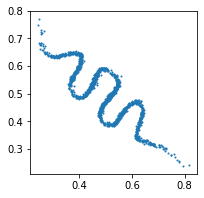

22100 0.0007253233925439417
22200 0.0007351437234319746
22300 0.0007024953956715763
22400 0.0007194882491603494
22500 0.0007710041827522218
22600 0.0007907213876023889
22700 0.0008551542414352298
22800 0.0006512043182738125
22900 0.0006946232751943171
23000 0.0007760982844047248
23100 0.0006584924994967878
23200 0.0006518473383039236
23300 0.0006197977345436811
23400 0.0006682859966531396
23500 0.0006694903713651001
23600 0.0007214594515971839
23700 0.0007089864229783416
23800 0.0006931921816430986
23900 0.000731377920601517
24000 0.0007383237243629992


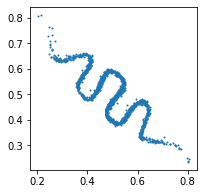

24100 0.000693875306751579
24200 0.0006406815373338759
24300 0.0006280998350121081
24400 0.00065424112835899
24500 0.0006779446266591549
24600 0.0007558331708423793
24700 0.0007126176496967673
24800 0.0006245954427868128
24900 0.0007241194834932685
25000 0.0007242421852424741
25100 0.0006970844115130603
25200 0.0006941025494597852
25300 0.0006365786539390683
25400 0.0007862068014219403
25500 0.0006237088819034398
25600 0.0005941477138549089
25700 0.0008011695463210344
25800 0.0006882821908220649
25900 0.000710094056557864
26000 0.0006832683575339615


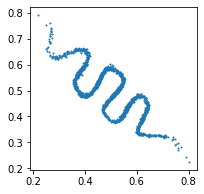

26100 0.0006829456542618573
26200 0.0006417018594220281
26300 0.0006931431125849485
26400 0.0006441994337365031
26500 0.0007155627245083451
26600 0.0006774915382266045
26700 0.0006585200317203999
26800 0.0006357252132147551
26900 0.0006326061557047069
27000 0.0006958379526622593
27100 0.0006996056181378663
27200 0.0007163026602938771
27300 0.0006551644764840603
27400 0.000685927749145776
27500 0.0007287320331670344
27600 0.0006279312656261027
27700 0.0006403222214430571
27800 0.0005953325307928026
27900 0.0007026808452792466
28000 0.0006590905250050128


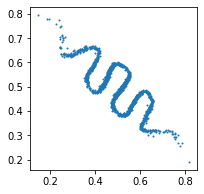

28100 0.0006246959092095494
28200 0.0006578085594810545
28300 0.0007038226467557251
28400 0.0006087047513574362
28500 0.0006441637524403632
28600 0.000658647099044174
28700 0.000671847490593791
28800 0.0006025040638633072
28900 0.0007754217949695885
29000 0.0005904390127398074
29100 0.0006880182190798223
29200 0.000599847873672843
29300 0.0006331034237518907
29400 0.0005955826491117477
29500 0.0006344744469970465
29600 0.0006035512778908014
29700 0.0007083027740009129
29800 0.000615917204413563
29900 0.0005795378237962723
30000 0.0006484146579168737


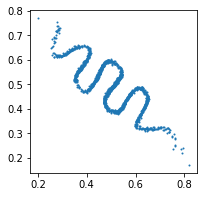

30100 0.000590394891332835
30200 0.0006121405167505145
30300 0.0006477581337094307
30400 0.0006850337376818061
30500 0.0006467853090725839
30600 0.0006221049115993083
30700 0.0006925485213287175
30800 0.0007064659148454666
30900 0.0006162142963148654
31000 0.000632725190371275
31100 0.0006874989485368133
31200 0.0006016955594532192
31300 0.0006352532072924078
31400 0.0005671269027516246
31500 0.0006521136965602636
31600 0.0006039523286744952
31700 0.0005720076733268797
31800 0.0006032029632478952
31900 0.0007189824827946723
32000 0.0006219850620254874


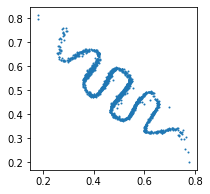

32100 0.0007116172928363085
32200 0.0006341836415231228
32300 0.0006969643873162568
32400 0.0006132667185738683
32500 0.0006762368720956147
32600 0.0005960152484476566
32700 0.0005546200554817915
32800 0.0006404813611879945
32900 0.0006273567560128868
33000 0.0005717664607800543
33100 0.000612641975749284
33200 0.0005962919676676393
33300 0.0006164892693050206
33400 0.0005763655644841492
33500 0.0006420987192541361
33600 0.0006280093220993876
33700 0.0006667447159998119
33800 0.0006345608271658421
33900 0.0005872405017726123
34000 0.0006586253875866532


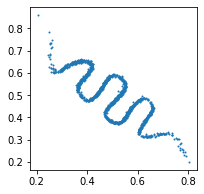

34100 0.0005561544094234705
34200 0.0006232983432710171
34300 0.0006192511646077037
34400 0.0006633435841649771
34500 0.000639633450191468
34600 0.0005671806866303086
34700 0.0005385735421441495
34800 0.0006427004700526595
34900 0.0005441972753033042
35000 0.0005439678207039833
35100 0.0005986690521240234
35200 0.0005926252924837172
35300 0.0006919084116816521
35400 0.0005586178158409894
35500 0.0006396436365321279
35600 0.0006199730560183525
35700 0.000672310998197645
35800 0.000653474940918386
35900 0.000540838111191988
36000 0.0005692857084795833


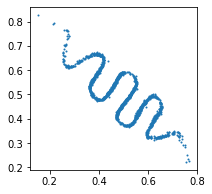

36100 0.0005581154837273061
36200 0.0006956998258829117
36300 0.0005763341323472559
36400 0.0005822617677040398
36500 0.0005350320716388524
36600 0.000507485878188163
36700 0.0005493039498105645
36800 0.0005039944662712514
36900 0.0005318230832926929
37000 0.0005963741568848491
37100 0.0005670132813975215
37200 0.0005474858335219324
37300 0.0005122771835885942
37400 0.0005103217554278672
37500 0.0007180526736192405
37600 0.0005487239686772227
37700 0.0006758635281585157
37800 0.000662579492200166
37900 0.0005629060324281454
38000 0.0005568501655943692


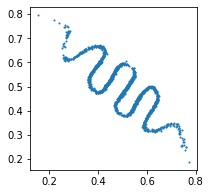

38100 0.0005298000178299844
38200 0.0005431604804471135
38300 0.0005898892995901406
38400 0.0005194766563363373
38500 0.0005738847539760172
38600 0.0004957440542057157
38700 0.0005642695468850434
38800 0.0005425008712336421
38900 0.0005228710360825062
39000 0.0006099129095673561
39100 0.0005563208251260221
39200 0.0006598590989597142
39300 0.0005231396062299609
39400 0.0006112392293289304
39500 0.0005466247675940394
39600 0.0005671169492416084
39700 0.0005422811955213547
39800 0.0006093032425269485
39900 0.000536112580448389
40000 0.0005597592098638415


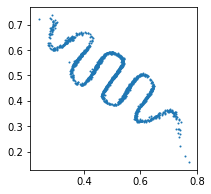

40100 0.0005368130514398217
40200 0.0005776493926532567
40300 0.0005340161733329296
40400 0.0005770519492216408
40500 0.0005331529537215829
40600 0.0005525652668438852
40700 0.0004867007664870471
40800 0.0005481908447109163
40900 0.0005109324119985104
41000 0.0005441292887553573
41100 0.00054081657435745
41200 0.0005355970934033394
41300 0.000585189729463309
41400 0.0005493663484230638
41500 0.0005128032644279301
41600 0.00048678574967198074
41700 0.0005311554996296763
41800 0.0004961516824550927
41900 0.0005890306201763451
42000 0.000510023906826973


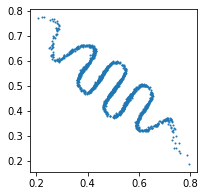

42100 0.0005262073245830834
42200 0.0005966541939415038
42300 0.0005478623206727207
42400 0.0005550123751163483
42500 0.0005012808833271265
42600 0.000528665550518781
42700 0.0005876661161892116
42800 0.0006109485984779894
42900 0.0006273819599300623
43000 0.0005781262298114598
43100 0.0005793284508399665
43200 0.0005144426831975579
43300 0.0006403598817996681
43400 0.0005490013863891363
43500 0.0005413159378804266
43600 0.0005644913180731237
43700 0.00048263027565553784
43800 0.0005047424347139895
43900 0.0004778576549142599
44000 0.0005171546945348382


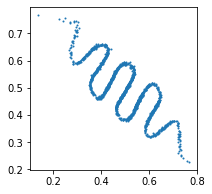

44100 0.0005348079721443355
44200 0.00055016326950863
44300 0.0005185981281101704
44400 0.0006394166266545653
44500 0.0005022714613005519
44600 0.0005408492288552225
44700 0.0005116146057844162
44800 0.0006229300634004176
44900 0.0005663323681801558
45000 0.0004791162209585309
45100 0.0005273320712149143
45200 0.0005805135588161647
45300 0.00047828321112319827
45400 0.0006041093147359788
45500 0.0005204644403420389
45600 0.0005203174077905715
45700 0.0005498090176843107
45800 0.00044797302689403296
45900 0.0005503855645656586
46000 0.0005068709142506123


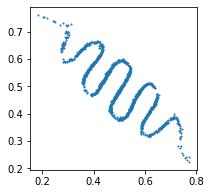

46100 0.0004808162047993392
46200 0.0005173968384042382
46300 0.0005509275360964239
46400 0.0005290472763590515
46500 0.0005280096083879471
46600 0.0005072167841717601
46700 0.0005193748511373997
46800 0.0004971103044226766
46900 0.0005272577400319278
47000 0.0005482734413817525
47100 0.00044370023533701897
47200 0.0005315172602422535
47300 0.0005375246983021498
47400 0.0005542511935345829
47500 0.0004399059689603746
47600 0.0005661080358549953
47700 0.0004960713558830321
47800 0.000492706021759659
47900 0.0004942058585584164
48000 0.000470949977170676


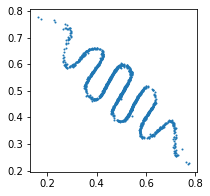

48100 0.0005910297622904181
48200 0.0004624061402864754
48300 0.0005314520676620305
48400 0.0005532857612706721
48500 0.0005827097920700908
48600 0.0004982928512617946
48700 0.0004994227201677859
48800 0.0006131385453045368
48900 0.0004330170922912657
49000 0.0005574814276769757
49100 0.0005056335357949138
49200 0.0005567825282923877
49300 0.0005940592382103205
49400 0.00047718157293275
49500 0.0005023098201490939
49600 0.0005550730274990201
49700 0.000521975161973387
49800 0.0005122597212903202
49900 0.00046669322182424366
50000 0.00045792898163199425


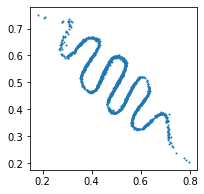

In [227]:
k = 2
train_data = run_dataset[k]

torch.cuda.set_device(4)

def gauss(A,B,var):
    return torch.exp(-((A.unsqueeze(1) - B.unsqueeze(0))**2).mean(2)/(2*var))

torch.manual_seed(0)
np.random.seed(0)

E = encoder(input_dim = 2, out_dim = 1).cuda()
D = decoder(input_dim = 1, out_dim = 2).cuda()

optimizer_E = optim.Adam([
      {'params': E.parameters(), 'lr': 0.0001, 'betas': (0.5, 0.9)},
   ])

optimizer_D = optim.Adam([
      {'params': D.parameters(), 'lr': 0.0001, 'betas': (0.5, 0.9)},
   ])

error_curve = []

for i in range(0, 50001):
    
    b1 = np.random.choice(train_data.shape[0], 2000)
    batch_data = torch.from_numpy(train_data[b1]).float().cuda()

    encoded = E(batch_data)
    decoded = D(encoded)
    
    error = ((decoded - batch_data)**2).mean(-1).mean(0)
    error.backward()
    error_curve.append(error.item())
    
    optimizer_E.step()
    optimizer_D.step()
    
    optimizer_E.zero_grad()
    optimizer_D.zero_grad()
    
    if i % 100 == 0:
        print(i, error.item())
        
        if i%2000 == 0:
            E.eval()
            D.eval()
            
            decoded = decoded.detach().cpu()
            plt.figure(figsize=(3, 3))
            plt.scatter(decoded[:, 0], decoded[:, 1], s=1)
            plt.show()
            
            E.train()
            D.train()

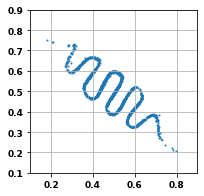

In [228]:
print_figures(decoded, 2)

0 0.04552009701728821


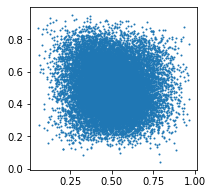

100 0.007424451876431704
200 0.005850228015333414
300 0.004457409027963877
400 0.0038634890224784613
500 0.0034076333977282047
600 0.0034802055452018976
700 0.0035434940364211798
800 0.0030640990007668734
900 0.0030738357454538345
1000 0.0026106543373316526
1100 0.002433336805552244
1200 0.002570362761616707
1300 0.002157517708837986
1400 0.002153337700292468
1500 0.0020960336551070213
1600 0.0026049858424812555
1700 0.0019845603965222836
1800 0.0020078644156455994
1900 0.002137011382728815
2000 0.0019178172806277871


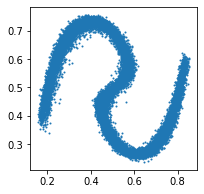

2100 0.0018586543155834079
2200 0.0019506524549797177
2300 0.0018693669699132442
2400 0.00220649060793221
2500 0.0017502341652289033
2600 0.0017582818400114775
2700 0.0022267610765993595
2800 0.001767834066413343
2900 0.0017118701944127679
3000 0.0016899146139621735
3100 0.001621659379452467
3200 0.0020471566822379827
3300 0.0016441213665530086
3400 0.0016923383809626102
3500 0.001571132568642497
3600 0.001699967309832573
3700 0.001650800695642829
3800 0.0016698978142812848
3900 0.0015479535795748234
4000 0.0015592660056427121


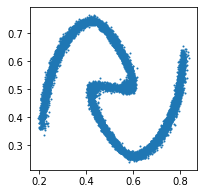

4100 0.0017370196292176843
4200 0.0015768882585689425
4300 0.0016648031305521727
4400 0.0014822101220488548
4500 0.0017170783830806613
4600 0.0014788629487156868
4700 0.0017690955428406596
4800 0.0014315719017758965
4900 0.0015601669438183308
5000 0.0016465793596580625
5100 0.0016046729870140553
5200 0.0015526704955846071
5300 0.001475740922614932
5400 0.0014205389888957143
5500 0.0014019114896655083
5600 0.0013936347095295787
5700 0.0014217420248314738
5800 0.0014838787028566003
5900 0.0014988917391747236
6000 0.0013808478834107518


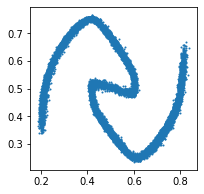

6100 0.0014081059489399195
6200 0.0015181219205260277
6300 0.001536667812615633
6400 0.0014298653695732355
6500 0.0013300563441589475
6600 0.0014478781959041953
6700 0.0014783742371946573
6800 0.001355779473669827
6900 0.0013628265587612987
7000 0.0013867599191144109
7100 0.001380203990265727
7200 0.0014156330144032836
7300 0.0013789371587336063
7400 0.001321593765169382
7500 0.0014564627781510353
7600 0.0013637242373079062
7700 0.001427960116416216
7800 0.0015014928067103028
7900 0.001332487678155303
8000 0.0014222728786990047


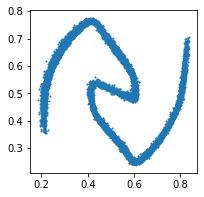

8100 0.001456646015867591
8200 0.0013585744891315699
8300 0.0013831802643835545
8400 0.0015871055657044053
8500 0.0013512213481590152
8600 0.0014374341117218137
8700 0.001375594292767346
8800 0.001296739443205297
8900 0.0015057745622470975
9000 0.0014478700468316674
9100 0.0013260586420074105
9200 0.0012675551697611809
9300 0.0015024663880467415
9400 0.001263048266991973
9500 0.0012880894355475903
9600 0.0014043819392099977
9700 0.0013586286222562194
9800 0.0013280205894261599
9900 0.0012811303604394197
10000 0.0013293909141793847


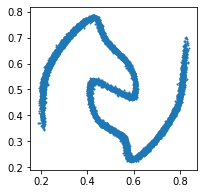

10100 0.0015239272033795714
10200 0.0012326384894549847
10300 0.001225369400344789
10400 0.0013162315590307117
10500 0.0012833316577598453
10600 0.0012375289807096124
10700 0.001308839418925345
10800 0.0012748335720971227
10900 0.0012560171307995915
11000 0.0012596378801390529
11100 0.0012836155947297812
11200 0.0013163909316062927
11300 0.0012972919503226876
11400 0.001325987745076418
11500 0.0013859583996236324
11600 0.0014482238329946995
11700 0.0011781114153563976
11800 0.0012283441610634327
11900 0.0012237222399562597
12000 0.0013787980424240232


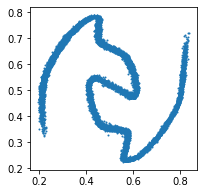

12100 0.0012322101974859834
12200 0.0012087965151295066
12300 0.001216828590258956
12400 0.0013064544182270765
12500 0.0013250295305624604
12600 0.0011817577760666609
12700 0.0011826360132545233
12800 0.0011244690977036953
12900 0.0012467302149161696
13000 0.0013323150342330337
13100 0.001206473563797772
13200 0.0011897726217284799
13300 0.0011771244462579489
13400 0.0012655238388106227
13500 0.0012112952535972
13600 0.0011565827298909426
13700 0.0011990463826805353
13800 0.0012011207873001695
13900 0.001511401031166315
14000 0.0011728813406080008


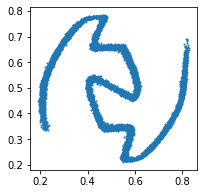

14100 0.001204012893140316
14200 0.0010941728251054883
14300 0.0010963958920910954
14400 0.0012738826917484403
14500 0.0013348670909181237
14600 0.0010788238141685724
14700 0.001098300563171506
14800 0.0011465532006695867
14900 0.0011472394689917564
15000 0.0011925846338272095
15100 0.0010731862857937813
15200 0.0012013826053589582
15300 0.0011548850452527404
15400 0.001138979336246848
15500 0.001138603314757347
15600 0.0011623947648331523
15700 0.0012314827181398869
15800 0.0011159280547872186
15900 0.0011291211703792214
16000 0.0011234220582991838


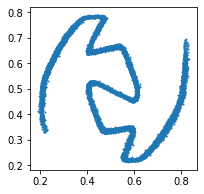

16100 0.0010995599441230297
16200 0.0011014684569090605
16300 0.0010892704594880342
16400 0.001086098374798894
16500 0.0011372880544513464
16600 0.0011443832190707326
16700 0.0010873349383473396
16800 0.0011421439703553915
16900 0.001328366226516664
17000 0.0010459754848852754
17100 0.0011347277322784066
17200 0.0010757754789665341
17300 0.001072144485078752
17400 0.0011428258148953319
17500 0.0011230470845475793
17600 0.001119807711802423
17700 0.0010789179941639304
17800 0.0011138193076476455
17900 0.0011185671901330352
18000 0.0011430546874180436


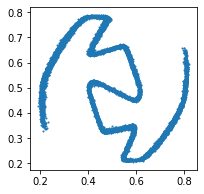

18100 0.0010717569384723902
18200 0.0010816289577633142
18300 0.0010530800791457295
18400 0.0011083035496994853
18500 0.0010515188332647085
18600 0.0010387086076661944
18700 0.0010152460308745503
18800 0.0010184893617406487
18900 0.0010123481042683125
19000 0.0011281947372481227
19100 0.0011040588142350316
19200 0.0011137345572933555
19300 0.0010659305844455957
19400 0.00101227848790586
19500 0.0010584124829620123
19600 0.0012145048240199685
19700 0.0011609233915805817
19800 0.0010110273724421859
19900 0.0011869949521496892
20000 0.0010464151855558157


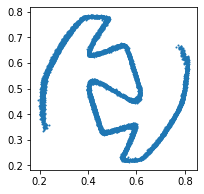

20100 0.0011143890442326665
20200 0.0010280676651746035
20300 0.0010164218256250024
20400 0.0010966851841658354
20500 0.0012187431566417217
20600 0.0010757147101685405
20700 0.0011822867672890425
20800 0.0010168877197429538
20900 0.0009872645605355501
21000 0.0010081478394567966
21100 0.0010037682950496674
21200 0.001041151350364089
21300 0.0010598129592835903
21400 0.0010539523791521788
21500 0.0009681430528871715
21600 0.0010362023022025824
21700 0.0011042245896533132
21800 0.0010516970651224256
21900 0.0010309371864423156
22000 0.0011583665618672967


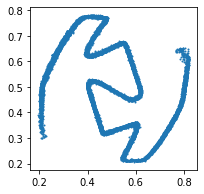

22100 0.0009860858554020524
22200 0.0010088480776175857
22300 0.001010240986943245
22400 0.0010770322987809777
22500 0.00108193454798311
22600 0.001068729325197637
22700 0.0009694045875221491
22800 0.0009901096345856786
22900 0.0009830838534981012
23000 0.0010015923762694001
23100 0.0010870160767808557
23200 0.0009695363696664572
23300 0.001037277397699654
23400 0.001039520837366581
23500 0.0010108387796208262
23600 0.0011183902388438582
23700 0.0011013303883373737
23800 0.0009731819154694676
23900 0.00099691201467067
24000 0.0009988935198634863


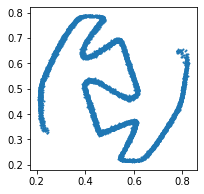

24100 0.0009587121894583106
24200 0.0009503206820227206
24300 0.0010262622963637114
24400 0.0010918822372332215
24500 0.0010203237179666758
24600 0.0010609154123812914
24700 0.0010391612304374576
24800 0.0009593259310349822
24900 0.0009379418333992362
25000 0.0009429935016669333
25100 0.0009291923488490283
25200 0.0010209569009020925
25300 0.0010135580087080598
25400 0.0010099459905177355
25500 0.0009125687647610903
25600 0.0009468416683375835
25700 0.0009714850457385182
25800 0.0009311645408160985
25900 0.0011201701126992702
26000 0.0009251368464902043


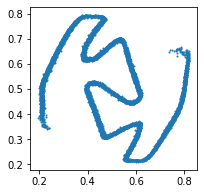

26100 0.0010907826945185661
26200 0.001000140211544931
26300 0.0008959897677414119
26400 0.0009726269636303186
26500 0.0010153047041967511
26600 0.000985909253358841
26700 0.0009612038265913725
26800 0.0010116779012605548
26900 0.0009561137994751334
27000 0.0009521133033558726
27100 0.0009726603166200221
27200 0.0009484371985308826
27300 0.0008972680661827326
27400 0.0009287775028496981
27500 0.0009491840028204024
27600 0.0009325746214017272
27700 0.0010481373174116015
27800 0.000916720659006387
27900 0.0008939288090914488
28000 0.001043579075485468


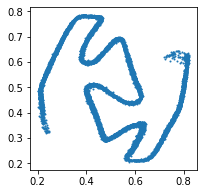

28100 0.0009097806760109961
28200 0.0009103698539547622
28300 0.000905851717106998
28400 0.0009556816075928509
28500 0.0009365077712573111
28600 0.0009722319082356989
28700 0.000934399024117738
28800 0.0008891311590559781
28900 0.001040278933942318
29000 0.0010190019384026527
29100 0.0009801776614040136
29200 0.0010150419548153877
29300 0.000927318527828902
29400 0.0009965667268261313
29500 0.0008986087632365525
29600 0.0009326707804575562
29700 0.0010427284287288785
29800 0.0010896397288888693
29900 0.0009700804366730154
30000 0.0009361537522636354


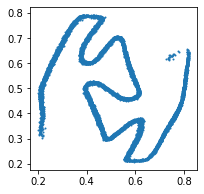

30100 0.0008642797474749386
30200 0.0009692666935734451
30300 0.0009451644727960229
30400 0.0009063332108780742
30500 0.0009410222992300987
30600 0.0011289599351584911
30700 0.0009145275107584894
30800 0.0009502918692305684
30900 0.0009717923821881413
31000 0.0009604876977391541
31100 0.0009504978079348803
31200 0.0010056101018562913
31300 0.0008681784383952618
31400 0.0009236476616933942
31500 0.0009193099685944617
31600 0.0008905691793188453
31700 0.0009741397807374597
31800 0.0009424509480595589
31900 0.0009401237475685775
32000 0.0008907070150598884


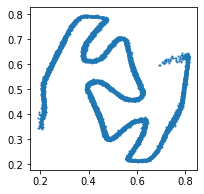

32100 0.0008996727992780507
32200 0.0008944415603764355
32300 0.0008949171751737595
32400 0.0009701188537292182
32500 0.0008788214181549847
32600 0.0008835610933601856
32700 0.0009745428105816245
32800 0.0008803436066955328
32900 0.001019359682686627
33000 0.0008974988595582545
33100 0.0009118887828662992
33200 0.0009157850290648639
33300 0.0010393484262749553
33400 0.00111432746052742
33500 0.000896602519787848
33600 0.0008578893612138927
33700 0.0008770783897489309
33800 0.0009281439706683159
33900 0.0009153308346867561
34000 0.0009381182608194649


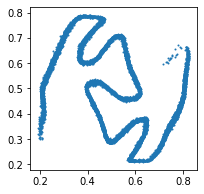

34100 0.0009193707956001163
34200 0.0009213897283188999
34300 0.000883540022186935
34400 0.0008715736912563443
34500 0.0009338099043816328
34600 0.0009255144977942109
34700 0.0008773548761382699
34800 0.0008802553056739271
34900 0.000901687191799283
35000 0.0008872631005942822
35100 0.0008494365611113608
35200 0.000919535115826875
35300 0.0008795525063760579
35400 0.0009012597147375345
35500 0.0009486142662353814
35600 0.000893696560524404
35700 0.0008709713583812118
35800 0.0009280963568016887
35900 0.0008862526738084853
36000 0.0009184328955598176


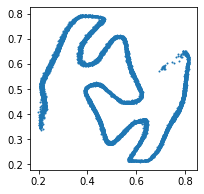

36100 0.000855070655234158
36200 0.0009173471480607986
36300 0.0009577872697263956
36400 0.0008832290186546743
36500 0.0010156575590372086
36600 0.0008758447365835309
36700 0.0008819864015094936
36800 0.0008897560182958841
36900 0.0008849230362102389
37000 0.0009143861825577915
37100 0.0008817674242891371
37200 0.0008892045589163899
37300 0.000901357620023191
37400 0.0008859781082719564
37500 0.0009123527561314404
37600 0.0008606819901615381
37700 0.0008694236748851836
37800 0.0008629165240563452
37900 0.0008680380415171385
38000 0.0009618696058169007


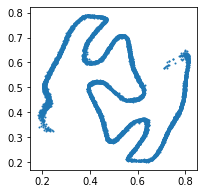

38100 0.00098607933614403
38200 0.000866252405103296
38300 0.0008768303669057786
38400 0.0008718743920326233
38500 0.000890887517016381
38600 0.0008386447443626821
38700 0.0009211708093062043
38800 0.0009133871062658727
38900 0.0008706520893611014
39000 0.0008486495935358107
39100 0.0009244332322850823
39200 0.0008538028341718018
39300 0.0009214931051246822
39400 0.0008847110439091921
39500 0.0008790586143732071
39600 0.0010306298499926925
39700 0.0009138260502368212
39800 0.0008650814997963607
39900 0.0008614156395196915
40000 0.0009304803679697216


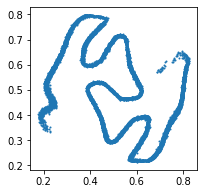

40100 0.0008815938490442932
40200 0.00085450493497774
40300 0.0008904257556423545
40400 0.0009317676303908229
40500 0.0008849077275954187
40600 0.0008219029987230897
40700 0.0008529079495929182
40800 0.0008755619055591524
40900 0.0008764450903981924
41000 0.0008531274506822228
41100 0.0009408351616002619
41200 0.0008189914515241981
41300 0.0008737544994801283
41400 0.0008222295437008142
41500 0.0008624152978882194
41600 0.0008432783652096987
41700 0.0008599347784183919
41800 0.0008876134525053203
41900 0.0008934355573728681
42000 0.0008519918192178011


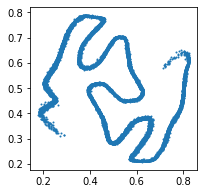

42100 0.0008694326388649642
42200 0.0008973082294687629
42300 0.000942098384257406
42400 0.0008806284749880433
42500 0.0008472406188957393
42600 0.0008269199170172215
42700 0.0009088641963899136
42800 0.0008329036645591259
42900 0.0008782359655015171
43000 0.0008596357074566185
43100 0.0009155437001027167
43200 0.0008425721898674965
43300 0.0008369760471396148
43400 0.000859523774124682
43500 0.0008491266053169966
43600 0.0008476720540784299
43700 0.0009025322506204247
43800 0.0008463753620162606
43900 0.0008776222239248455
44000 0.0008306268719024956


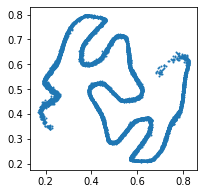

44100 0.0009326755534857512
44200 0.0008289464749395847
44300 0.0008471828186884522
44400 0.0008870762540027499
44500 0.0008186486084014177
44600 0.0008707305532880127
44700 0.0008183081517927349
44800 0.0007704059244133532
44900 0.0008852455648593605
45000 0.0008315093000419438
45100 0.0007880443590693176
45200 0.0009265873814001679
45300 0.0009899958968162537
45400 0.0008477751398459077
45500 0.0009335014037787914
45600 0.0008508622995577753
45700 0.0008961988496594131
45800 0.0008459851960651577
45900 0.0008491717162542045
46000 0.0008304502116516232


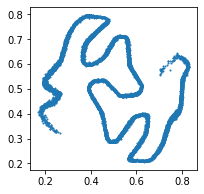

46100 0.0009729819721542299
46200 0.0008189859217964113
46300 0.0008265688666142523
46400 0.0008291483391076326
46500 0.0007826725486665964
46600 0.0008482492412440479
46700 0.0007905298843979836
46800 0.0008440236561000347
46900 0.0009477147832512856
47000 0.0008088290924206376
47100 0.000792582577560097
47200 0.000920237333048135
47300 0.0008721523336134851
47400 0.0007889125845395029
47500 0.0007968107820488513
47600 0.0009752057958394289
47700 0.0009038602584041655
47800 0.0008644229383207858
47900 0.0008375613833777606
48000 0.0008940927218645811


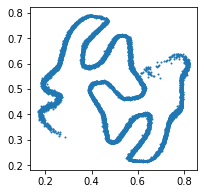

48100 0.0008663738262839615
48200 0.0008204730693250895
48300 0.0008320685010403395
48400 0.0009139408939518034
48500 0.0009024349274113774
48600 0.0008836333872750401
48700 0.0008104686276055872
48800 0.0008184272446669638
48900 0.0008721625781618059
49000 0.0009059797157533467
49100 0.000781666545663029
49200 0.0008559279958717525
49300 0.0008780303760431707
49400 0.0007854918367229402
49500 0.000857748556882143
49600 0.0008008456788957119
49700 0.0008608999196439981
49800 0.0008410142618231475
49900 0.0008331562858074903
50000 0.0008275492582470179


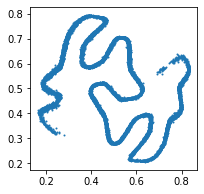

In [286]:
k = 1
train_data = run_dataset[k]

torch.cuda.set_device(4)

def gauss(A,B,var):
    return torch.exp(-((A.unsqueeze(1) - B.unsqueeze(0))**2).mean(2)/(2*var))

torch.manual_seed(0)
np.random.seed(0)

E = encoder(input_dim = 2, out_dim = 1).cuda()
D = decoder(input_dim = 1, out_dim = 2).cuda()

optimizer_E = optim.Adam([
      {'params': E.parameters(), 'lr': 0.0001, 'betas': (0.5, 0.9)},
   ])

optimizer_D = optim.Adam([
      {'params': D.parameters(), 'lr': 0.0001, 'betas': (0.5, 0.9)},
   ])

error_curve = []

for i in range(0, 50001):
    
    b1 = np.random.choice(train_data.shape[0], 20000)
    batch_data = torch.from_numpy(train_data[b1]).float().cuda()

    encoded = E(batch_data)
    decoded = D(encoded)
    
    error = ((decoded - batch_data)**2).mean(-1).mean(0)
    error.backward()
    error_curve.append(error.item())
    
    optimizer_E.step()
    optimizer_D.step()
    
    optimizer_E.zero_grad()
    optimizer_D.zero_grad()
    
    if i % 100 == 0:
        print(i, error.item())
        
        if i%2000 == 0:
            E.eval()
            D.eval()
            
            decoded = decoded.detach().cpu()
            plt.figure(figsize=(3, 3))
            plt.scatter(decoded[:, 0], decoded[:, 1], s=1)
            plt.show()
            
            E.train()
            D.train()

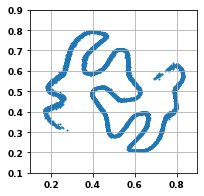

In [287]:
print_figures(decoded, 1)

In [ ]:
torch.cuda.set_device(6)

size = 50
resized_image = skimage.transform.resize(pdf[20:-20,20:-20], (size, size), order=3, mode='constant', anti_aliasing=True)
res_pdf = resized_image/resized_image.sum()
res_pdf = torch.from_numpy(res_pdf)

encoder = net(input_dim = size**2, HIDDEN = 2000, out_dim = 1).cuda()
decoder = net(input_dim = 2000, HIDDEN = 2000, out_dim = 2).cuda()

error_list = []
error_list_2 = []

optimizer = optim.Adam([
      {'params': encoder.parameters(), 'lr': 0.0001, 'betas': (0.0, 0.0)},
      {'params': decoder.parameters(), 'lr': 0.0001, 'betas': (0.0, 0.0)},
   ])

xx = np.linspace(-1.05, 1.05, size)
yy = np.linspace(-1.05, 1.05, size)
XX, YY = np.meshgrid(xx, yy)

grid_points = torch.from_numpy(np.column_stack([XX.ravel(), YY.ravel()]))

for i in range(0, 50001):

    center_y = encoder(torch.eye(size**2).cuda())
    continuous_y = torch.from_numpy(np.linspace(-1.1, 1.1, 2000)).unsqueeze(1).cuda()
    p_y_given_x = torch.exp(-((continuous_y.unsqueeze(1) - center_y.unsqueeze(0))**2).mean(-1)/0.001)

    center_x = decoder(torch.eye(2000).cuda())
    p_x_given_y = torch.exp(-((grid_points.unsqueeze(1).cuda() - center_x.unsqueeze(0))**2).mean(-1)/0.001)
    
    error = -((grid_points.unsqueeze(1).cuda() - center_x.unsqueeze(0))**2).mean(-1)

    pxy = p_y_given_x*res_pdf.reshape(1, -1).cuda()
    
    loss = (pxy*(error.T)).sum()
    (-loss).backward()
    
    optimizer.step()
    optimizer.zero_grad()
        
    if i % 100 == 0:
        print(i, loss.item())
        
        if i%500 == 0:
            plt.imshow((pxy.T@p_x_given_y.T).detach().cpu().sum(0).reshape(size, size))
            plt.show()

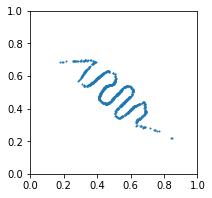

In [226]:
decoded = decoded.detach().cpu().numpy()
plt.figure(figsize=(3, 3))
plt.scatter(decoded[:, 0], decoded[:, 1], s=1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

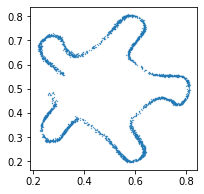

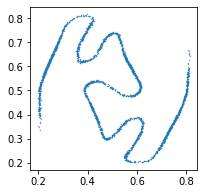

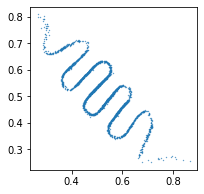

In [250]:
plt.figure(figsize=(3, 3))
plt.scatter(save_centers[0][:, 0], save_centers[0][:, 1], s=.1)
plt.show()

plt.figure(figsize=(3, 3))
plt.scatter(save_centers[1][:, 0], save_centers[1][:, 1], s=.1)
plt.show()

plt.figure(figsize=(3, 3))
plt.scatter(save_centers[2][:, 0], save_centers[2][:, 1], s=.1)
plt.show()

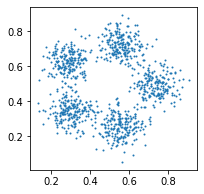

In [189]:
train_data = run_dataset[0]

b1 = np.random.choice(train_data.shape[0], 1000)
batch_data = torch.from_numpy(train_data[b1]).float().cuda()

plt.figure(figsize=(3, 3))
plt.scatter(batch_data.detach().cpu()[:, 0], batch_data.detach().cpu()[:, 1], s=1)
plt.show()

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# save figures

est_pdf_save = np.load('est_pdf.npy')
save_centers = np.load('save_centers.npy')

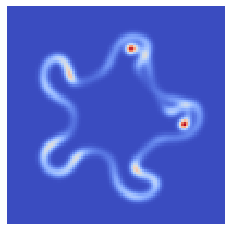

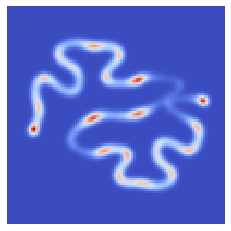

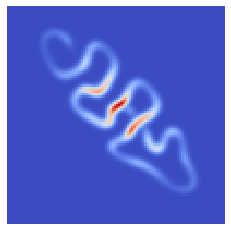

In [62]:
plt.imshow(est_pdf_save[0][::-1], cmap='coolwarm')
plt.axis('off')
plt.savefig('est_pdf_0.pdf',bbox_inches='tight', dpi=300)
plt.show()

plt.imshow(est_pdf_save[1][::-1], cmap='coolwarm')
plt.axis('off')
plt.savefig('est_pdf_1.pdf',bbox_inches='tight', dpi=300)
plt.show()

plt.imshow(est_pdf_save[3][::-1], cmap='coolwarm')
plt.axis('off')
plt.savefig('est_pdf_3.pdf',bbox_inches='tight', dpi=300)
plt.show()

In [63]:
# bold_font = FontProperties()
# bold_font.set_weight('bold')
# bold_font.set_size(10)
# sns.despine(trim=True, offset=5)

# for label in ax.get_xticklabels():
#     label.set_fontproperties(bold_font)

# # Set tick labels to bold for the y-axis
# for label in ax.get_yticklabels():
#     label.set_fontproperties(bold_font)

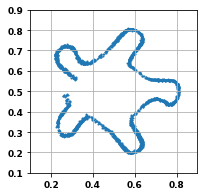

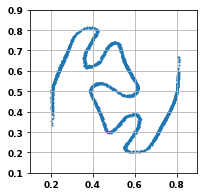

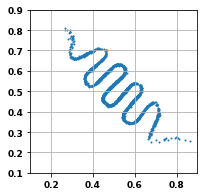

In [64]:
from matplotlib.font_manager import FontProperties
import seaborn as sns

def print_figures(centers, k):
    fig, ax = plt.subplots(figsize=(3, 3))
    
    plt.scatter(centers[:, 0], centers[:, 1], s=1)
    
    bold_font = FontProperties()
    bold_font.set_weight('bold')
    bold_font.set_size(9)
#     sns.despine(trim=True, offset=5)

    for label in ax.get_xticklabels():
        label.set_fontproperties(bold_font)

    # Set tick labels to bold for the y-axis
    for label in ax.get_yticklabels():
        label.set_fontproperties(bold_font)
    
    plt.xlim(0.1, 0.9)
    plt.ylim(0.1, 0.9)
    
    plt.grid('None')

    plt.savefig('{0}.png'.format(k),bbox_inches='tight', dpi=300)
    
    plt.show()
    
print_figures(save_centers[0], 0)
print_figures(save_centers[1], 1)
print_figures(save_centers[2], 2)

print_figures(run_dataset[0], 0)
print_figures(run_dataset[1], 1)
print_figures(run_dataset[2], 2)

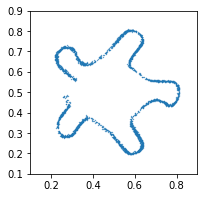

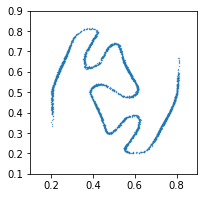

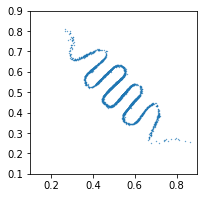

In [23]:
save_centers = np.load('save_centers.npy')

plt.figure(figsize=(3, 3))
plt.scatter(save_centers[0][:, 0], save_centers[0][:, 1], s=.1)
plt.xlim(0.1, 0.9)
plt.ylim(0.1, 0.9)
plt.show()

plt.figure(figsize=(3, 3))
plt.scatter(save_centers[1][:, 0], save_centers[1][:, 1], s=.1)
plt.xlim(0.1, 0.9)
plt.ylim(0.1, 0.9)
plt.show()

plt.figure(figsize=(3, 3))
plt.scatter(save_centers[2][:, 0], save_centers[2][:, 1], s=.1)
plt.xlim(0.1, 0.9)
plt.ylim(0.1, 0.9)
plt.show()

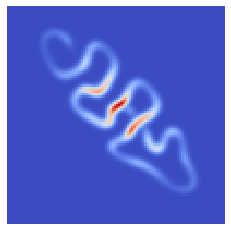

In [21]:
plt.imshow(est_pdf_save[3][::-1], cmap='coolwarm')
plt.axis('off')
plt.savefig('est_pdf_3.pdf',bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# np.save('est_pdf.npy', torch.stack(est_pdf_save).numpy())
# np.save('save_centers.npy', np.stack(save_centers))